In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
Insurance_claim=pd.read_csv("insurance_claim.csv")
Insurance_claim

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

This is a classification problem, String data is present which needs to be encoded.

In [3]:
Insurance_claim.shape

(1000, 40)

In the given dataset we have 1000 rows and 40 columns '_c39' is having all nan value so we will drop it. 

### DataFrame Description


Insurance industry now-a-days is facing a lot of problem for identifying the genuine insurance claims.Machine Learning models can help insurance industries to come out of trouble. In the current dataset various parameters are provided which has impact whether a customer is fraulently claiming insurance or not.
In the dataset we have months_as_customer column which is how many months the customer has taken the policy. Age column depicts the age of the customer, then the third column denotes the policy_number of the policy holder, fourth column policy_bind_date denotes the date on which the customer bought the policy.Column police_report_available tells us about the police report availability, total_claim_amount is the claim amount of the insured vehicle.injury_claim column tells us about the claim in case of injury faced by the customer in case of accident.property_claim column tells us about the claim amount paid to customer in case of damage to the property.auto_make column tells us about the automobile company manufacturer of the vehicle. auto_model tells us about the model of the vehicle, auto_year tells us about the year of manufacturer of the vehicle.fraud_reported column tells us about the fraud reported ot not: Yes or No.

### Checking the Datatypes of the columns

In [4]:
Insurance_claim.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
Insurance_claim=Insurance_claim.drop('_c39',axis=1)

In [6]:
Insurance_claim.tail(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[5 rows x 39 columns]

In [7]:
Insurance_claim.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There is no null value in the dataframe.

In [8]:
Insurance_claim['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [9]:
Insurance_claim.loc[Insurance_claim["fraud_reported"]== " "] #for checking empty value

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

[0 rows x 39 columns]

In [10]:
Insurance_claim.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [11]:
Insurance_claim.tail(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[5 rows x 39 columns]

In [12]:
Insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [13]:
Insurance_claim['incident_date']=pd.to_datetime(Insurance_claim['incident_date'])
Insurance_claim['policy_bind_date']=pd.to_datetime(Insurance_claim['policy_bind_date'])

In [14]:
# adding new column day,month,year in dataframe 
Insurance_claim['Day_incident_date']=Insurance_claim['incident_date'].dt.day
Insurance_claim['Month_incident_date']=Insurance_claim['incident_date'].dt.month
Insurance_claim['Year_incident_date']=Insurance_claim['incident_date'].dt.year
print(Insurance_claim)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-06-09           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-05-01           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

In [15]:
# adding new column day,month,year in dataframe 
Insurance_claim['Day_policy_bind_date']=Insurance_claim['policy_bind_date'].dt.day
Insurance_claim['Month_policy_bind_date']=Insurance_claim['policy_bind_date'].dt.month
Insurance_claim['Year_policy_bind_date']=Insurance_claim['policy_bind_date'].dt.year
print(Insurance_claim)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-06-09           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-05-01           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

In [16]:
Insurance_claim = Insurance_claim.drop(['policy_bind_date','incident_date'], axis=1)

In [17]:
Insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

## Univariate Analysis for Classification

### Making DataFrame for Nominal Data

In [18]:
Insurance_claim_nominal=Insurance_claim[['policy_state','policy_csl','policy_deductable','umbrella_limit','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','auto_make','auto_year','fraud_reported','Day_incident_date','Month_incident_date','Year_incident_date','Day_policy_bind_date','Month_policy_bind_date','Year_policy_bind_date']].copy()
Insurance_claim_nominal

policy_state policy_csl  policy_deductable  umbrella_limit insured_sex  \
0             OH    250/500               1000               0        MALE   
1             IN    250/500               2000         5000000        MALE   
2             OH    100/300               2000         5000000      FEMALE   
3             IL    250/500               2000         6000000      FEMALE   
4             IL   500/1000               1000         6000000        MALE   
..           ...        ...                ...             ...         ...   
995           OH   500/1000               1000               0      FEMALE   
996           IL    100/300               1000               0      FEMALE   
997           OH    250/500                500         3000000      FEMALE   
998           IL   500/1000               2000         5000000        MALE   
999           OH    250/500               1000               0      FEMALE   

    insured_education_level insured_occupation insured_hobbies  \
0                        MD       craft-repair        sleeping   
1                        MD  machine-op-inspct         reading   
2                       PhD              sales     board-games   
3                       PhD       armed-forces     board-games   
4                 Associate              sales     board-games   
..                      ...                ...             ...   
995                 Masters       craft-repair       paintball   
996                     PhD     prof-specialty        sleeping   
997                 Masters       armed-forces  bungie-jumping   
998               Associate  handlers-cleaners    base-jumping   
999               Associate              sales        kayaking   

    insured_relationship             incident_type  ...  \
0                husband  Single Vehicle Collision  ...   
1         other-relative             Vehicle Theft  ...   
2              own-child   Multi-vehicle Collision  ...   
3              unmarried  Single Vehicle Collision  ...   
4              unmarried             Vehicle Theft  ...   
..                   ...                       ...  ...   
995            unmarried  Single Vehicle Collision  ...   
996                 wife  Single Vehicle Collision  ...   
997       other-relative   Multi-vehicle Collision  ...   
998                 wife  Single Vehicle Collision  ...   
999              husband                Parked Car  ...   

    police_report_available   auto_make auto_year fraud_reported  \
0                       YES        Saab      2004              Y   
1                         ?    Mercedes      2007              Y   
2                        NO       Dodge      2007              N   
3                        NO   Chevrolet      2014              Y   
4                        NO      Accura      2009              N   
..                      ...         ...       ...            ...   
995                       ?       Honda      2006              N   
996                       ?  Volkswagen      2015              N   
997                     YES      Suburu      1996              N   
998                     YES        Audi      1998              N   
999                       ?    Mercedes      2007              N   

    Day_incident_date  Month_incident_date  Year_incident_date  \
0                  25                    1                2015   
1                  21                    1                2015   
2                  22                    2                2015   
3                   1                   10                2015   
4                  17                    2                2015   
..                ...                  ...                 ...   
995                22                    2                2015   
996                24                    1                2015   
997                23                    1                2015   
998                26                    2                2015   
999                26 

In [19]:
Insurance_claim_nominal.columns

Index(['policy_state', 'policy_csl', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'auto_make', 'auto_year',
       'fraud_reported', 'Day_incident_date', 'Month_incident_date',
       'Year_incident_date', 'Day_policy_bind_date', 'Month_policy_bind_date',
       'Year_policy_bind_date'],
      dtype='object')

### Vizualization of the data :

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


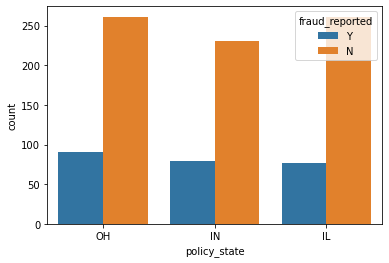

In [20]:
ax=sns.countplot(x="policy_state", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["policy_state"].value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


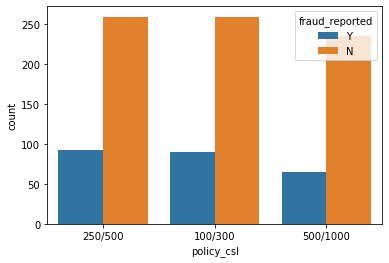

In [21]:
ax=sns.countplot(x="policy_csl", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["policy_csl"].value_counts())

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


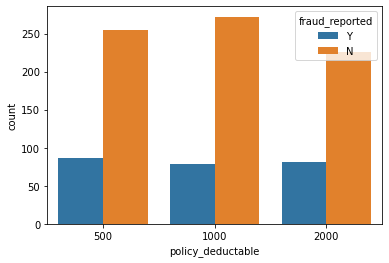

In [22]:
ax=sns.countplot(x="policy_deductable", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["policy_deductable"].value_counts())

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


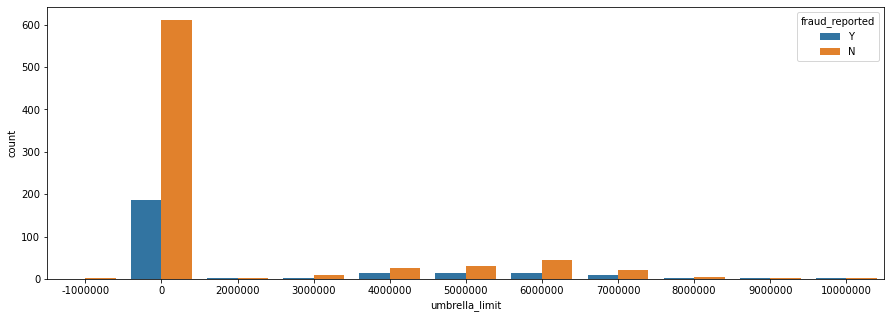

In [23]:
countplt,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(x="umbrella_limit", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["umbrella_limit"].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


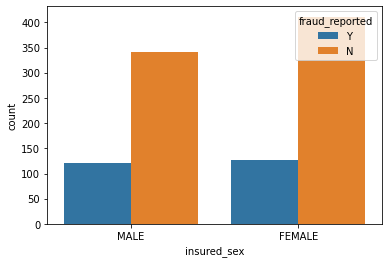

In [24]:
ax=sns.countplot(x="insured_sex", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["insured_sex"].value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


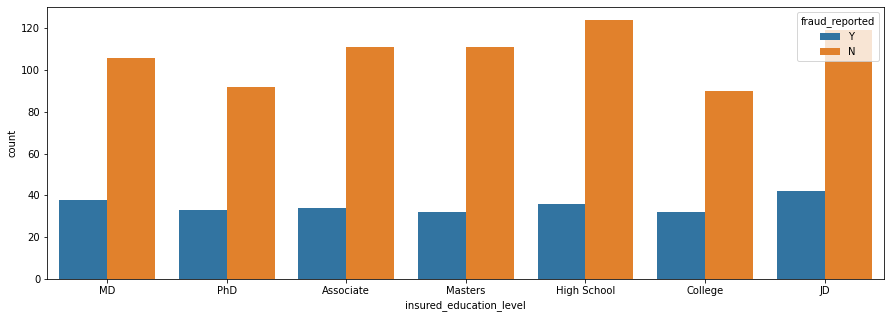

In [25]:
countplt,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(x="insured_education_level", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["insured_education_level"].value_counts())

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


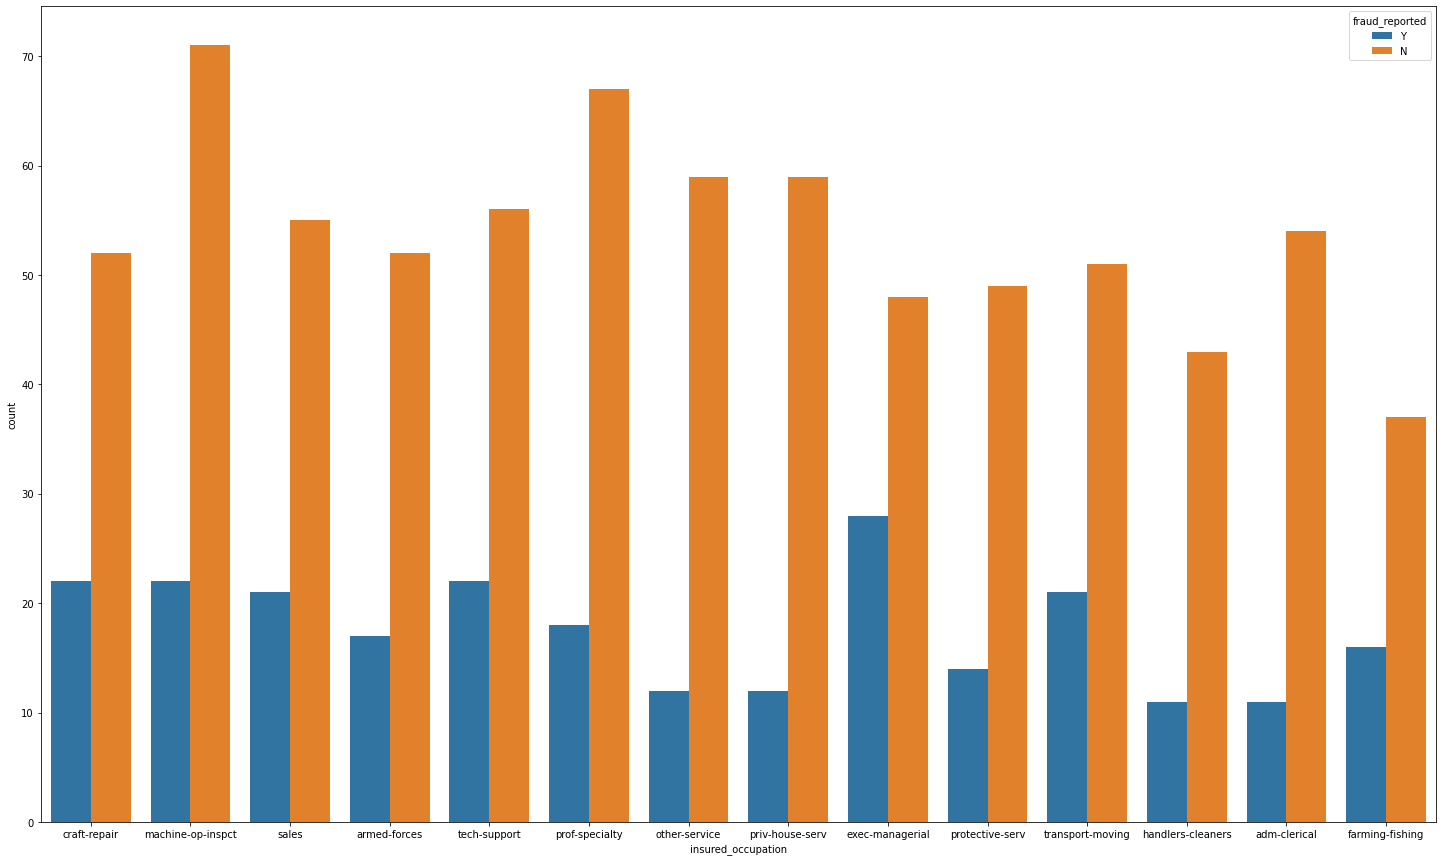

In [26]:
countplt,ax=plt.subplots(figsize=(25,15))
ax=sns.countplot(x="insured_occupation", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["insured_occupation"].value_counts())

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


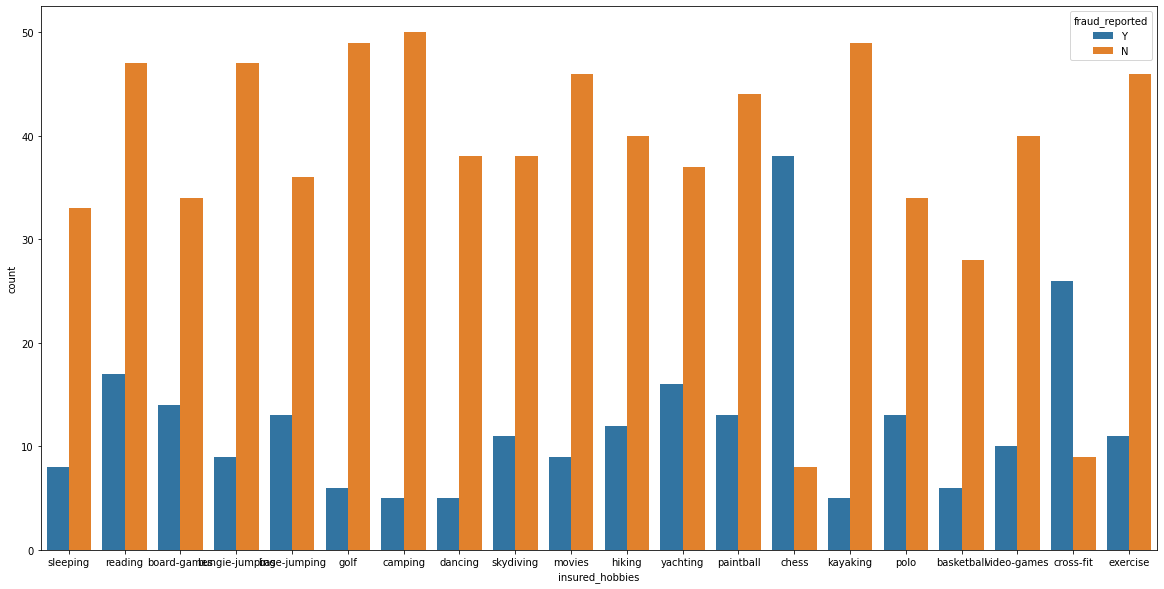

In [27]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="insured_hobbies", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["insured_hobbies"].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


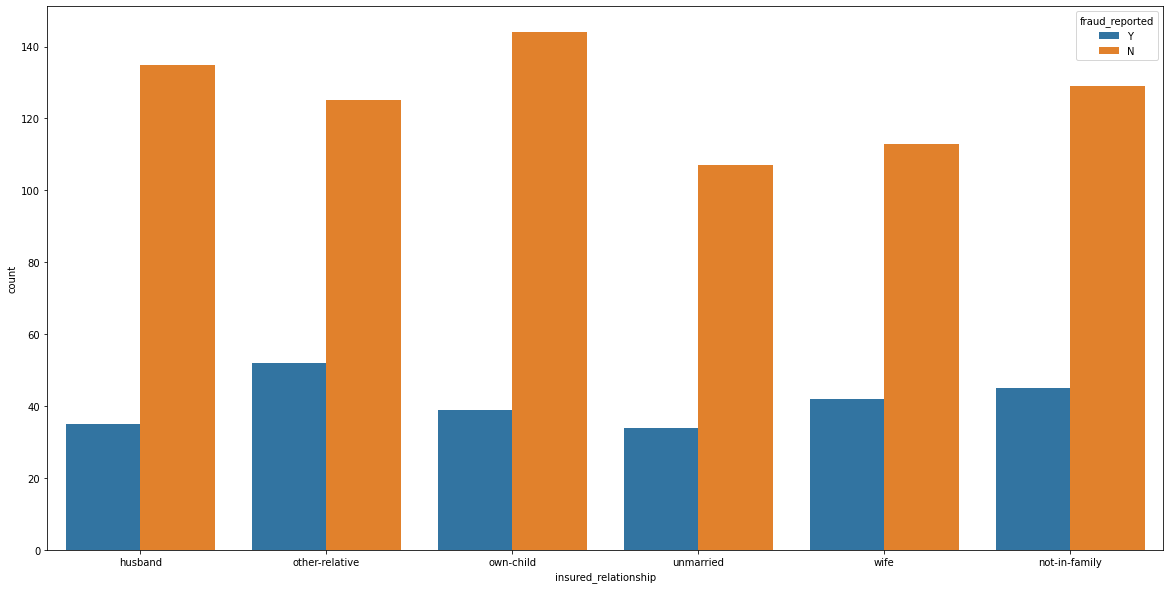

In [28]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="insured_relationship", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["insured_relationship"].value_counts())

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


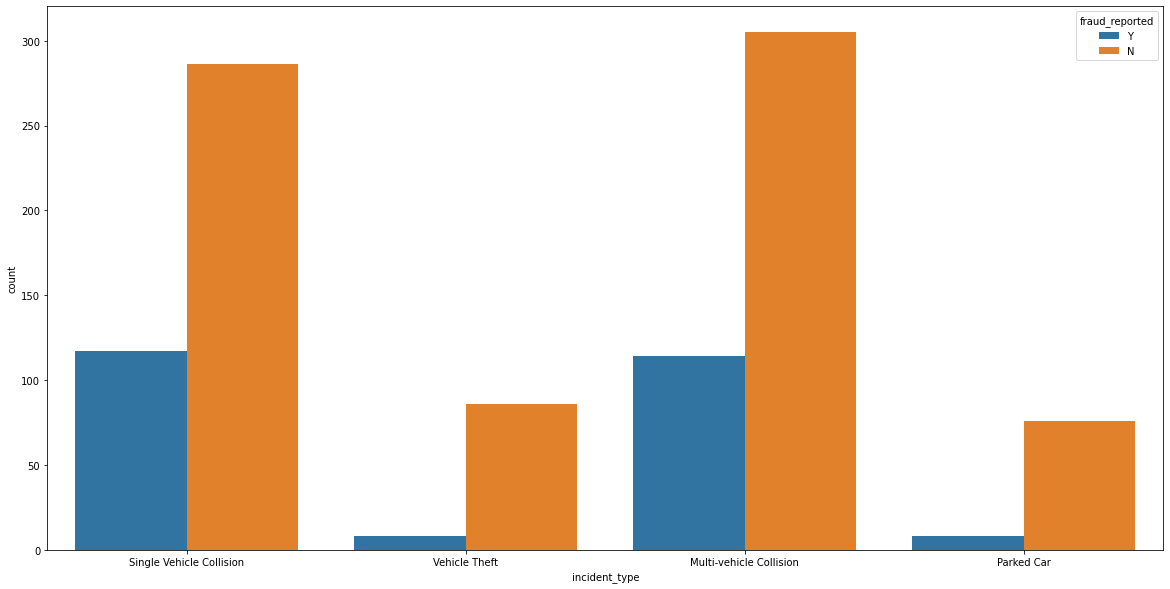

In [29]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="incident_type", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["incident_type"].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


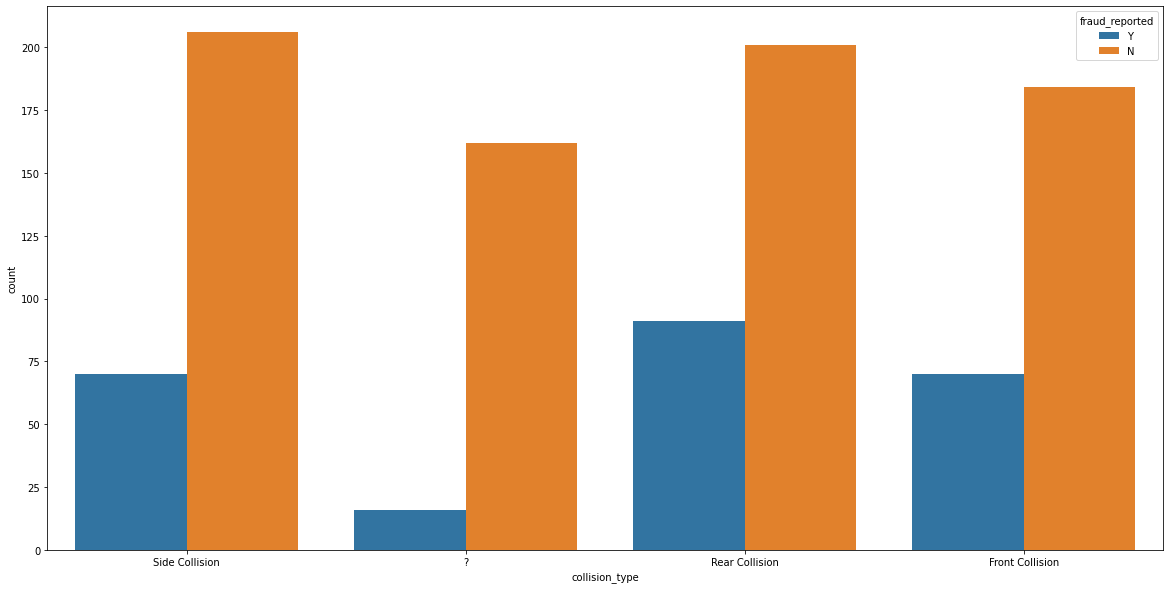

In [30]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="collision_type", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["collision_type"].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


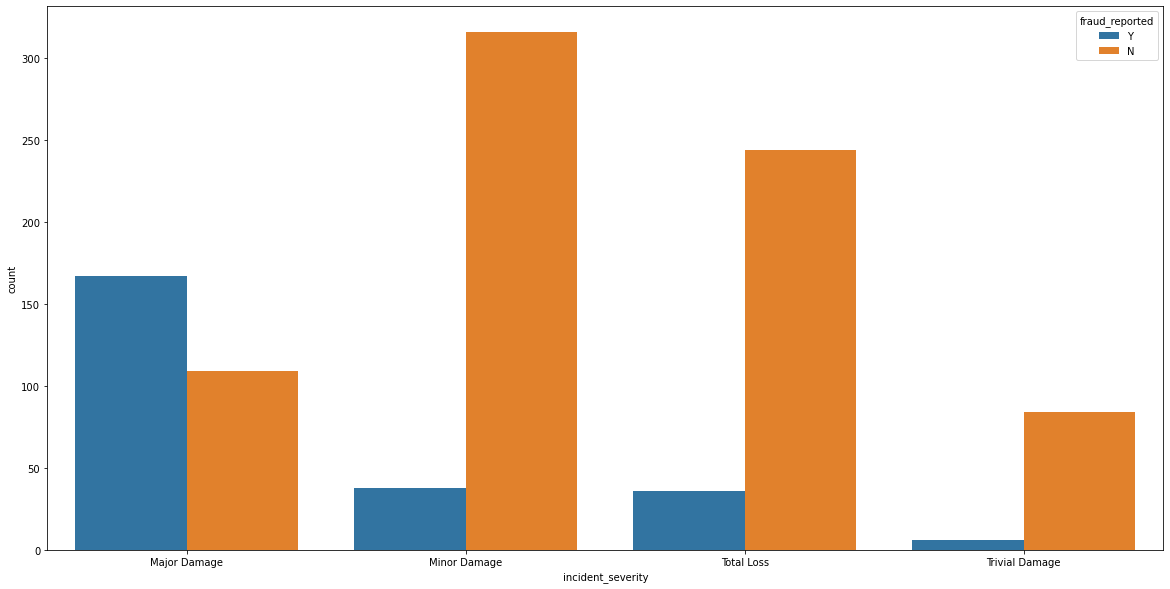

In [31]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="incident_severity", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["incident_severity"].value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


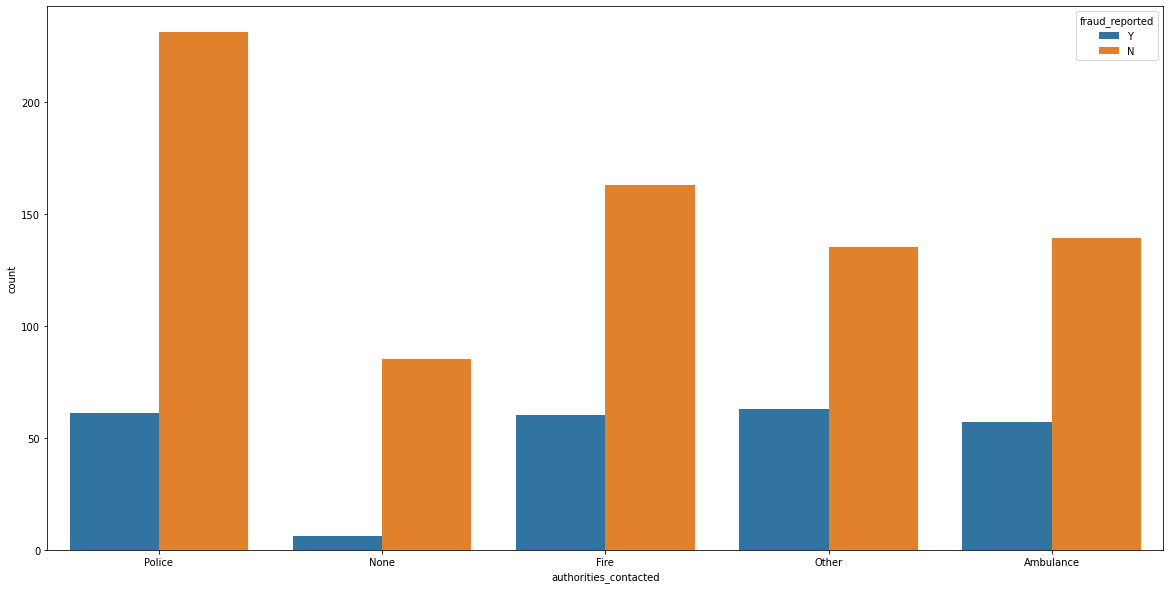

In [32]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="authorities_contacted", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["authorities_contacted"].value_counts())

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


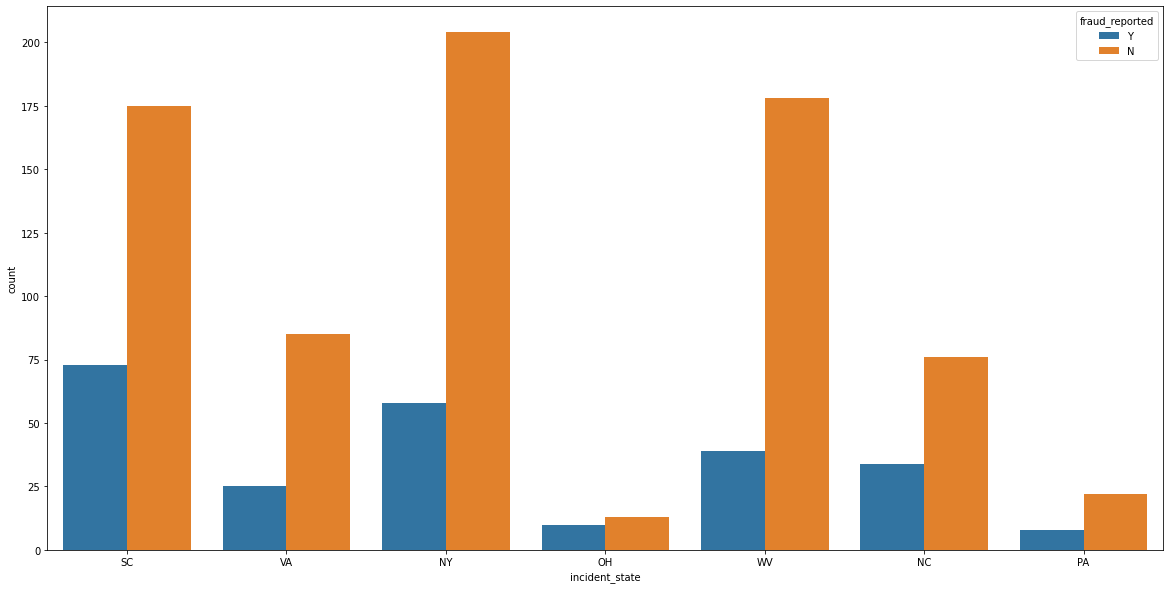

In [33]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="incident_state", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["incident_state"].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


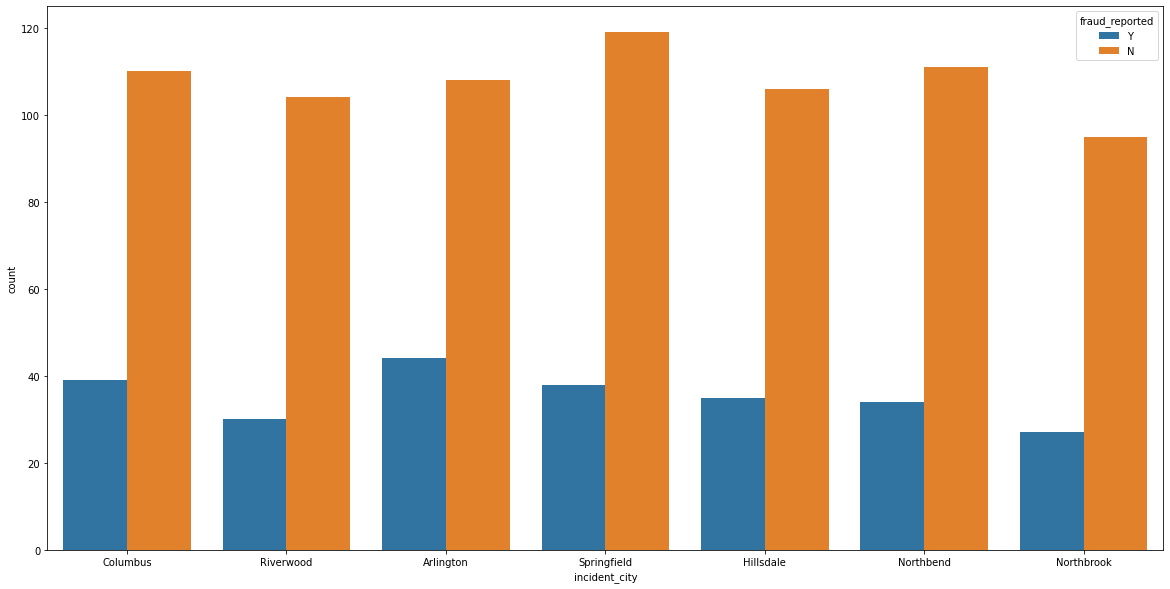

In [34]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="incident_city", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["incident_city"].value_counts())

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


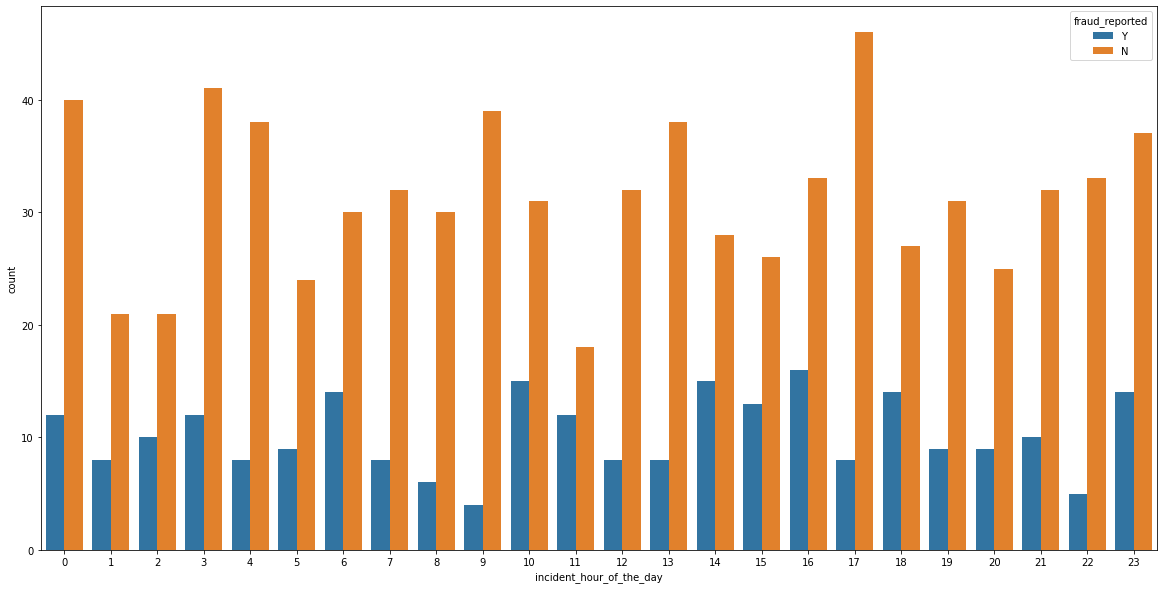

In [35]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="incident_hour_of_the_day", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["incident_hour_of_the_day"].value_counts())

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


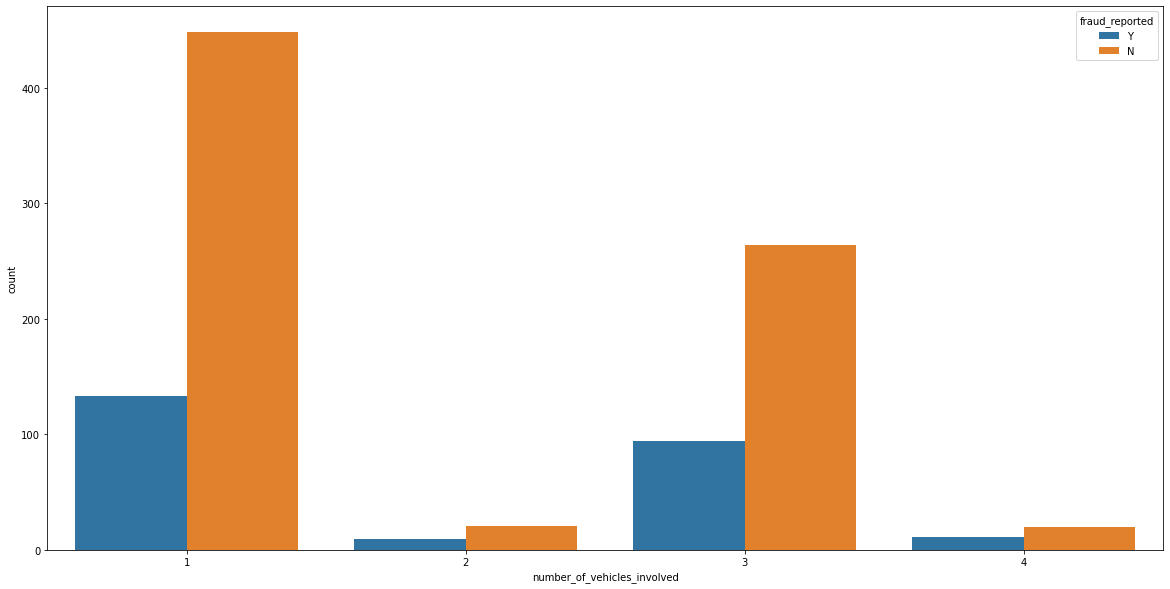

In [36]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="number_of_vehicles_involved", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["number_of_vehicles_involved"].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


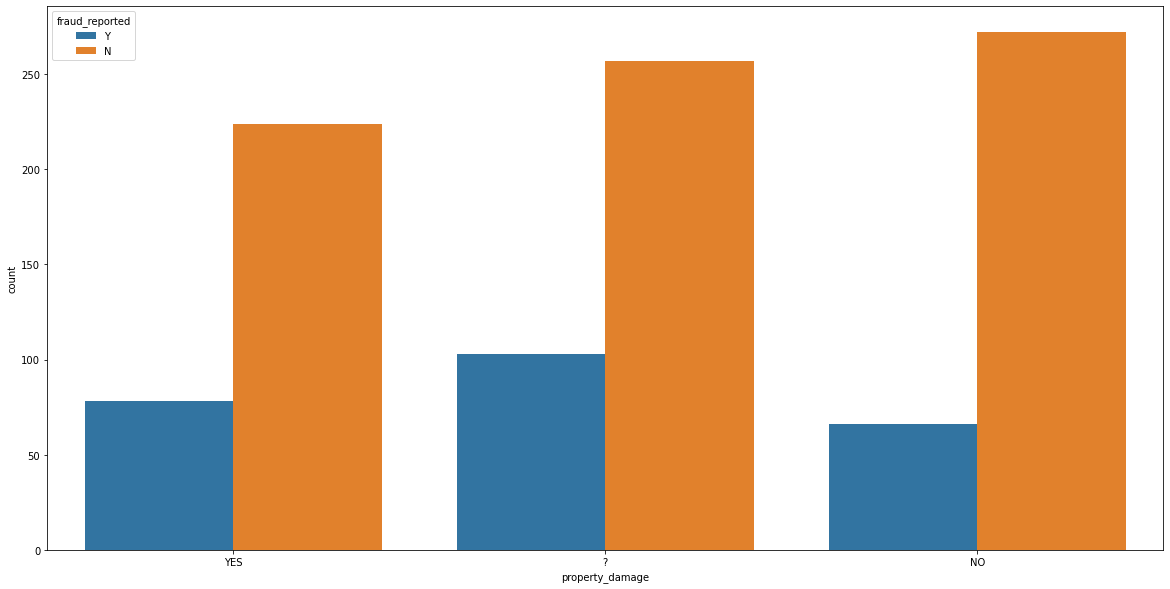

In [37]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="property_damage", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["property_damage"].value_counts())

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


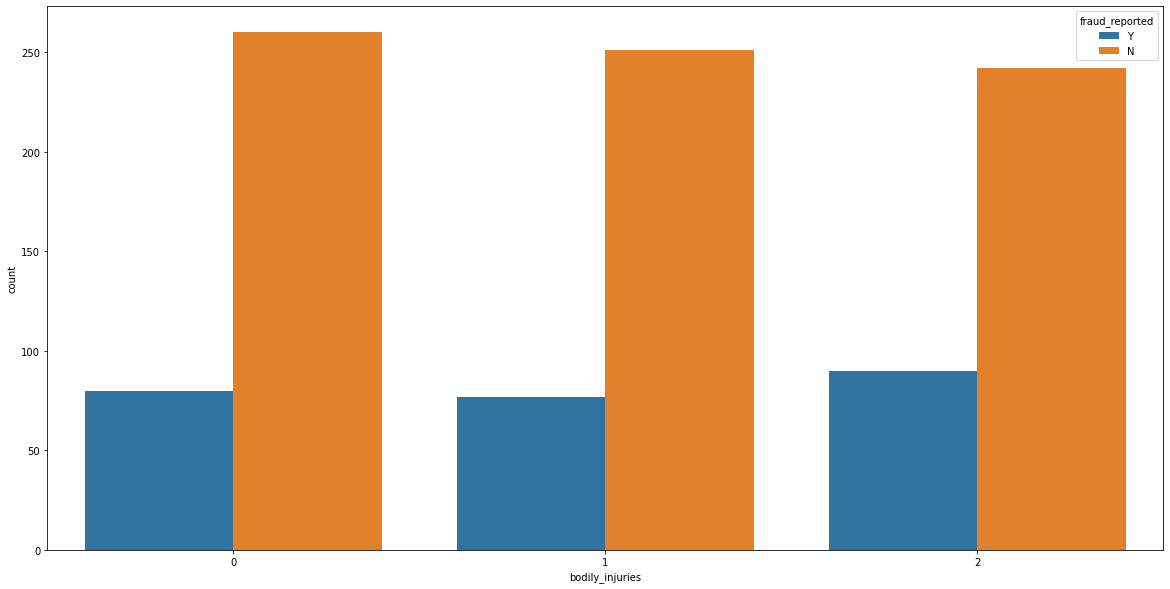

In [38]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="bodily_injuries", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["bodily_injuries"].value_counts())

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


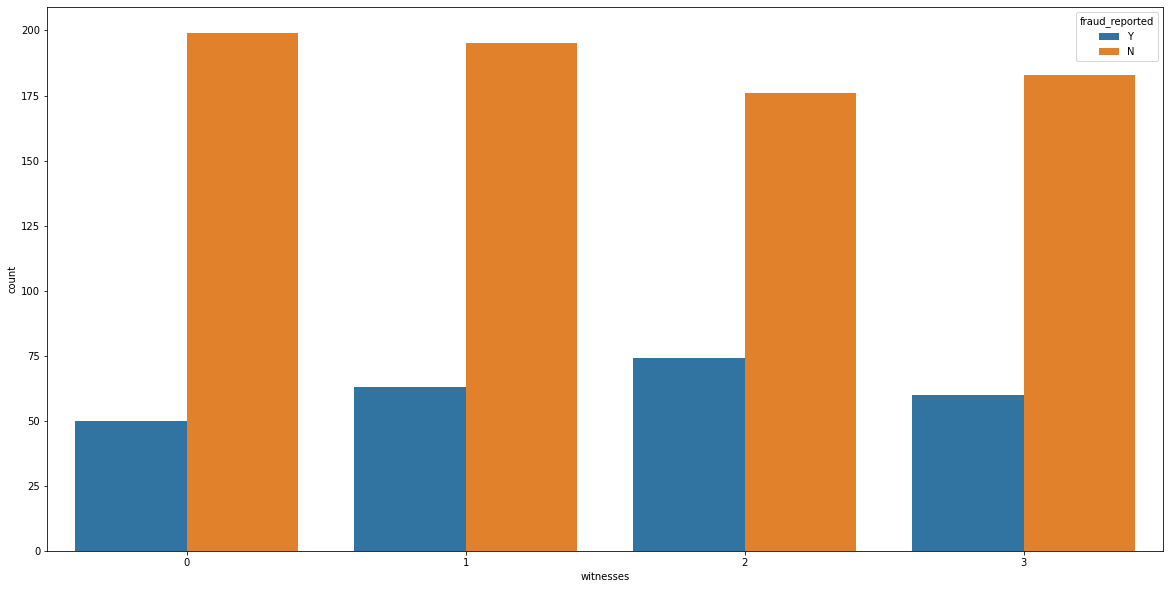

In [39]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="witnesses", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["witnesses"].value_counts())

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


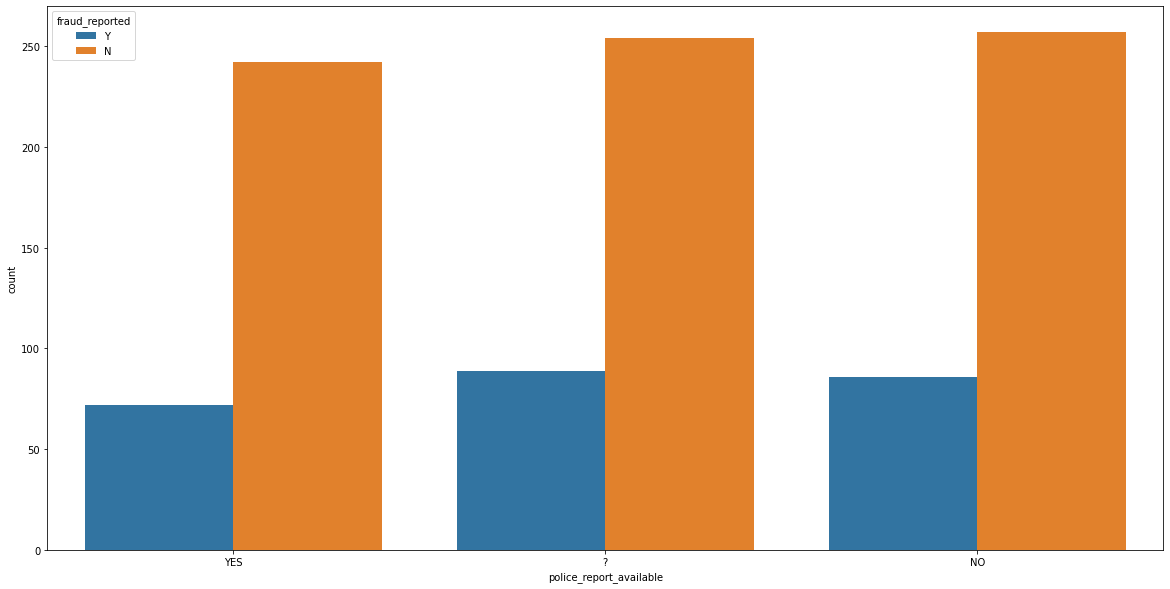

In [40]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="police_report_available", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["police_report_available"].value_counts())

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


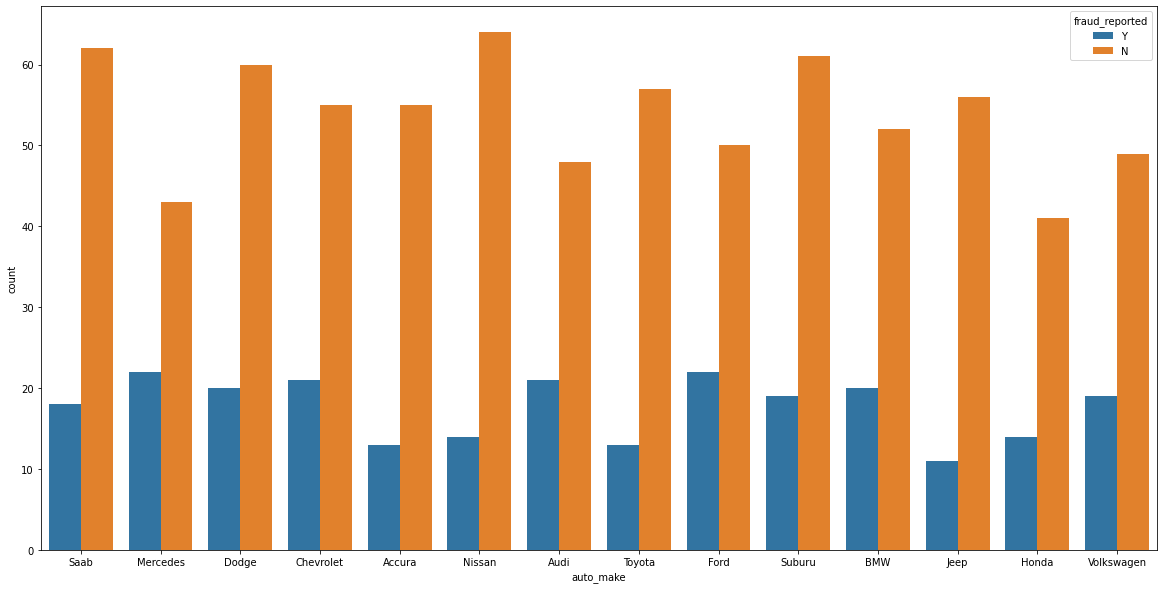

In [41]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="auto_make", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["auto_make"].value_counts())

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


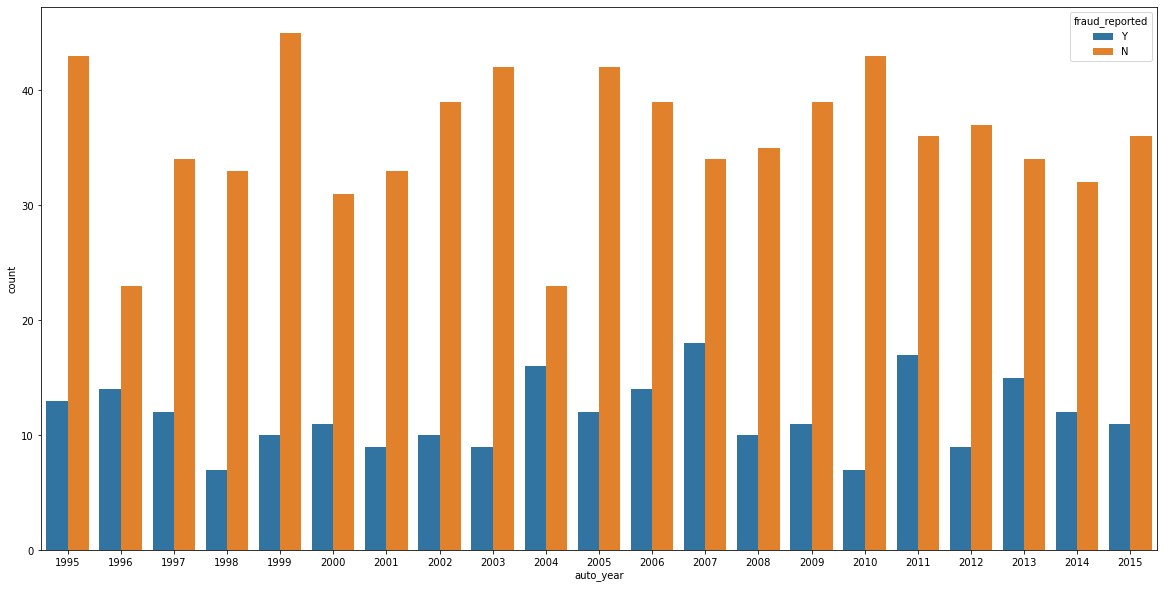

In [42]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="auto_year", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["auto_year"].value_counts())

1     200
2     199
24     41
17     41
21     38
13     37
14     37
22     34
19     33
28     33
18     33
16     32
20     32
23     32
15     31
25     28
26     28
27     27
30     21
31     20
3      12
29     11
Name: Day_incident_date, dtype: int64


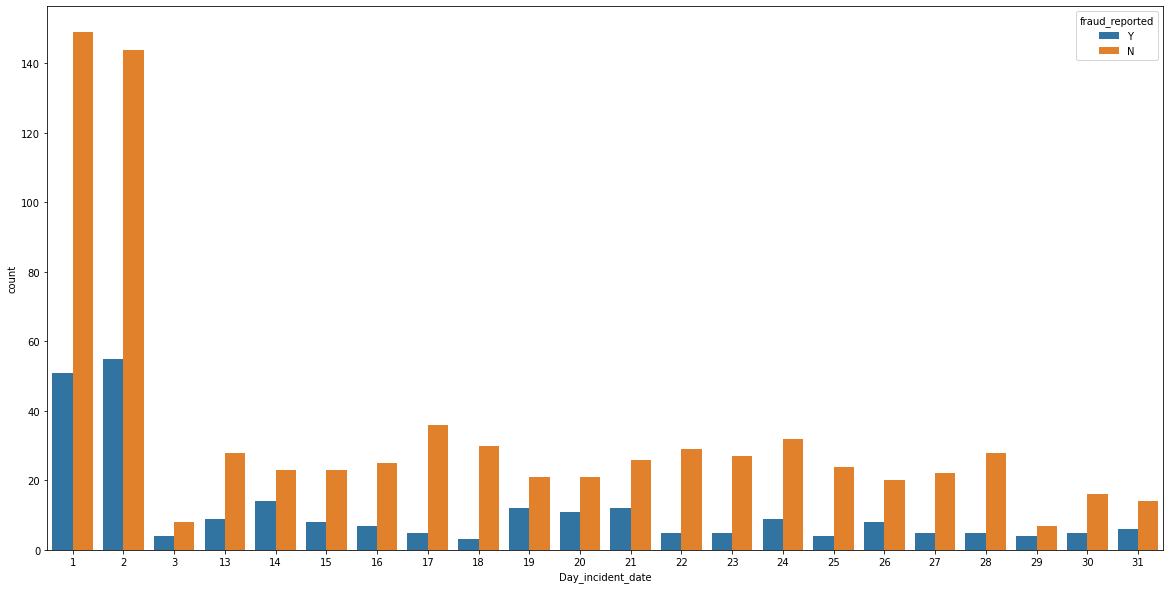

In [43]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="Day_incident_date", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["Day_incident_date"].value_counts())

1     365
2     312
12     39
8      39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: Month_incident_date, dtype: int64


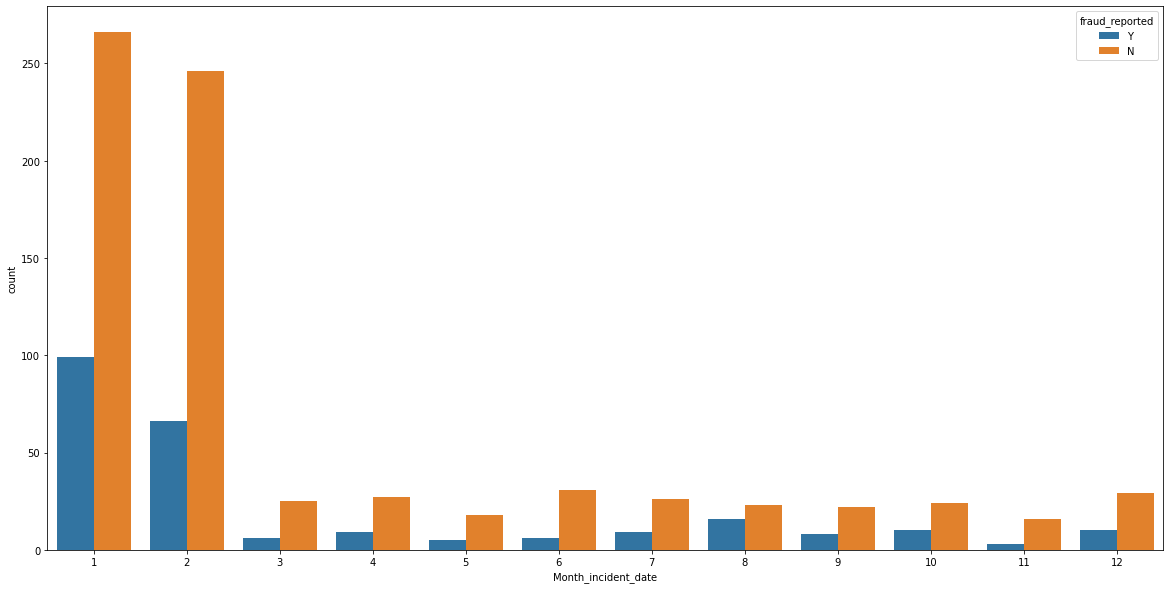

In [44]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="Month_incident_date", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["Month_incident_date"].value_counts())

2015    1000
Name: Year_incident_date, dtype: int64


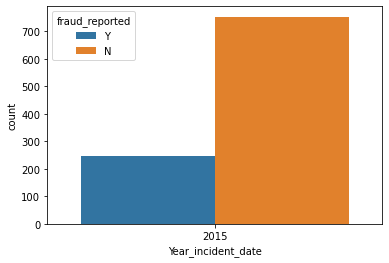

In [45]:
ax=sns.countplot(x="Year_incident_date", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["Year_incident_date"].value_counts())

28    48
2     44
12    44
8     41
18    40
21    40
16    37
29    37
3     37
25    37
7     35
1     35
11    34
19    33
20    33
10    32
15    31
14    31
24    31
4     31
17    30
27    30
5     29
6     28
30    26
23    26
13    24
22    23
9     23
26    19
31    11
Name: Day_policy_bind_date, dtype: int64


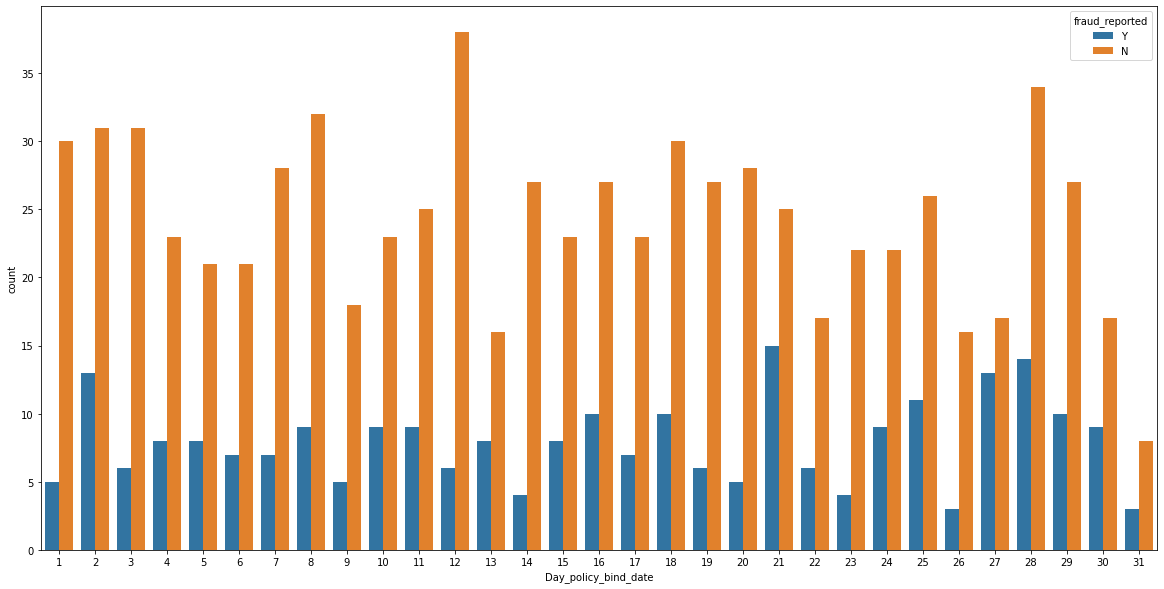

In [46]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="Day_policy_bind_date", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["Day_policy_bind_date"].value_counts())

7     96
11    91
9     87
6     86
4     86
5     84
8     82
1     80
10    79
3     79
12    76
2     74
Name: Month_policy_bind_date, dtype: int64


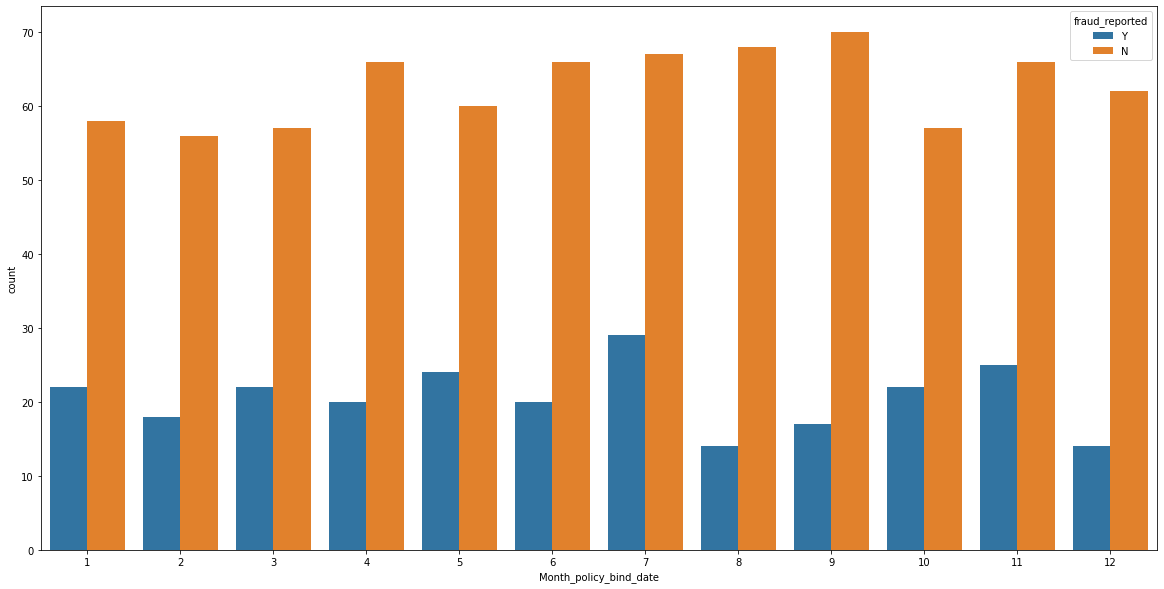

In [47]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="Month_policy_bind_date", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["Month_policy_bind_date"].value_counts())

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
1994    41
2006    41
2001    41
2007    40
2005    40
1999    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
1993    33
2008    33
2011    32
2000    31
1998    30
2015     3
Name: Year_policy_bind_date, dtype: int64


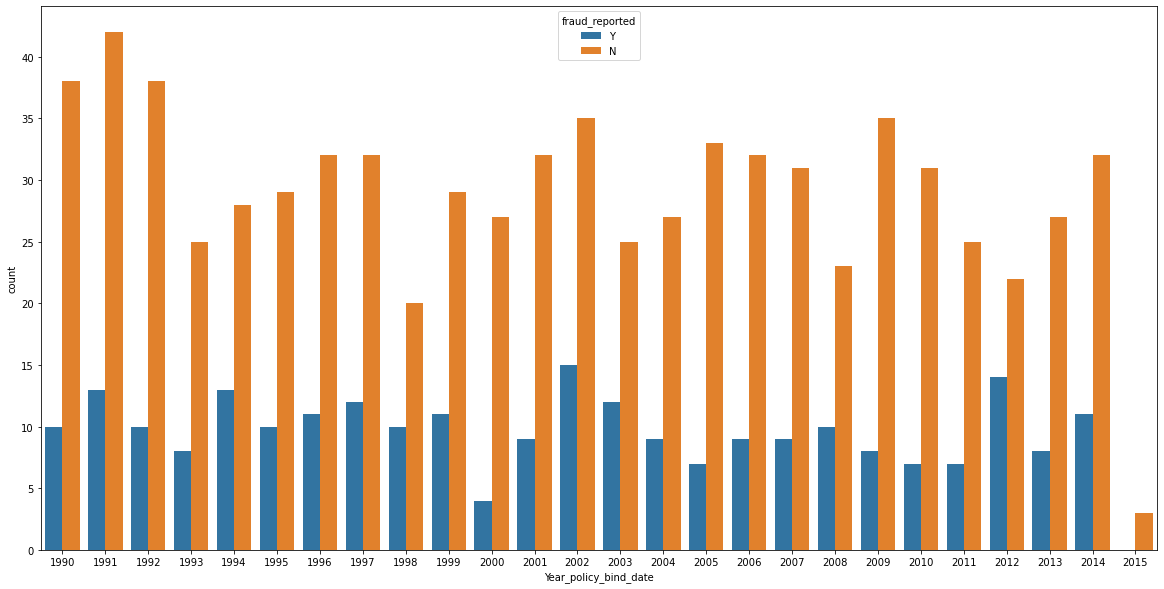

In [48]:
countplt,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot(x="Year_policy_bind_date", data=Insurance_claim_nominal, hue="fraud_reported")
print(Insurance_claim_nominal["Year_policy_bind_date"].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


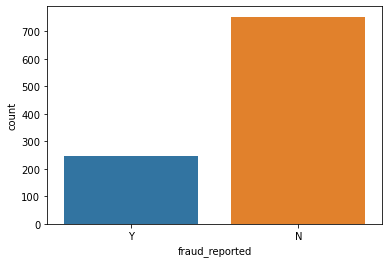

In [49]:
ax=sns.countplot(x="fraud_reported", data=Insurance_claim_nominal)
print(Insurance_claim_nominal["fraud_reported"].value_counts())

Since it is a class imbalance problem we will use SMOTE technique for balancing the class.

## Label Encoding String Data

In [50]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [51]:
for i in Insurance_claim.columns:
    if Insurance_claim[i].dtypes=="object":
        Insurance_claim[i]=enc.fit_transform(Insurance_claim[i].values.reshape(-1,1))

In [52]:
Insurance_claim

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585           2.0         1.0   
1                   228   42         342868           1.0         1.0   
2                   134   29         687698           2.0         0.0   
3                   256   41         227811           0.0         1.0   
4                   228   44         367455           0.0         2.0   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851           2.0         2.0   
996                 285   41         186934           0.0         0.0   
997                 130   34         918516           2.0         1.0   
998                 458   62         533940           0.0         2.0   
999                 456   60         556080           2.0         1.0   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ...  auto_make  auto_model  auto_year  fraud_reported  \
0            1.0  ...       10.0         1.0       2004             1.0   
1            1.0  ...        8.0        12.0       2007             1.0   
2            0.0  ...        4.0        30.0       2007             0.0   
3            0.0  ...        3.0        34.0       2014             1.0   
4            1.0  ...        0.0        31.0       2009             0.0   
..           ...  ...        ...         ...        ...             ...   
995          0.0  ...        6.0         6.0       2006             0.0   
996          0.0  ...       13.0        28.0       2015             0.0   
997          0.0  ...       11.0        19.0       1996             0.0   
998          1.0  ...        1.0         5.0       1998             0.0   
999          0.0  ...        8.0        12.0       2007             0.0   

     Day_incident_date  Month_incident_date  Year_incident_date  \
0                   25                    1                2015   
1                   21                    1                2015   
2                   22                    2                2015   
3                    1                   10                2015   
4                   17                    2                2015   
..                 ...                  ...                 ...   
995                 22                    2                2015   
996                 24                    1                2015   
997                 23                    1                2015   
998                 26                    2                2015   
999                 26                    2                2015   

     Day_policy_bind_date  Month_policy_bind_date  Year_policy_bind_date  
0                      17                      10                   2014  
1                      27                       6                   2006  
2                       9                       6                   2000  
3                      25                       5                   1990  
4                       6                       6                   2014  
..                    ...          

### Applying SMOTE for class imbalance

In [53]:
import sklearn
sklearn.__version__

'1.0.1'

In [54]:
import numpy 
numpy.__version__

'1.19.2'

In [55]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\user\anaconda3\lib\site-packages (0.8.1)


In [56]:
Insurance_claim_x=Insurance_claim.drop('fraud_reported',axis=1)
Insurance_claim_x

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585           2.0         1.0   
1                   228   42         342868           1.0         1.0   
2                   134   29         687698           2.0         0.0   
3                   256   41         227811           0.0         1.0   
4                   228   44         367455           0.0         2.0   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851           2.0         2.0   
996                 285   41         186934           0.0         0.0   
997                 130   34         918516           2.0         1.0   
998                 458   62         533940           0.0         2.0   
999                 456   60         556080           2.0         1.0   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ...  vehicle_claim  auto_make  auto_model  auto_year  \
0            1.0  ...          52080       10.0         1.0       2004   
1            1.0  ...           3510        8.0        12.0       2007   
2            0.0  ...          23100        4.0        30.0       2007   
3            0.0  ...          50720        3.0        34.0       2014   
4            1.0  ...           4550        0.0        31.0       2009   
..           ...  ...            ...        ...         ...        ...   
995          0.0  ...          61040        6.0         6.0       2006   
996          0.0  ...          72320       13.0        28.0       2015   
997          0.0  ...          52500       11.0        19.0       1996   
998          1.0  ...          36540        1.0         5.0       1998   
999          0.0  ...           3680        8.0        12.0       2007   

     Day_incident_date  Month_incident_date  Year_incident_date  \
0                   25                    1                2015   
1                   21                    1                2015   
2                   22                    2                2015   
3                    1                   10                2015   
4                   17                    2                2015   
..                 ...                  ...                 ...   
995                 22                    2                2015   
996                 24                    1                2015   
997                 23                    1                2015   
998                 26                    2                2015   
999                 26                    2                2015   

     Day_policy_bind_date  Month_policy_bind_date  Year_policy_bind_date  
0                      17                      10                   2014  
1                      27                       6                   2006  
2                       9                       6                   2000  
3                      25                       5                   1990  
4                       6                       6                   2014  
..                    ...                     .

In [57]:
Insurance_claim_y=Insurance_claim['fraud_reported']

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smt=SMOTE()
Insurance_claim_X,Insurance_claim_Y=smt.fit_resample(Insurance_claim_x,Insurance_claim_y)

In [60]:
Insurance_claim_X.value_counts()

months_as_customer  age  policy_number  policy_state  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  capital-gains  capital-loss  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  incident_location  incident_hour_of_the_day  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_model  auto_year  Day_incident_date  Month_incident_date  Year_incident_date  Day_policy_bind_date  Month_policy_bind_date  Year_policy_bind_date
479                 60   698589         0.000000      2.000000    1000               1188.450000            0               459295       0.000000     4.000000                 3.000000            4.000000         2.00000               0              -44800       

In [61]:
Insurance_claim_Y.value_counts()

0.0    753
1.0    753
Name: fraud_reported, dtype: int64

In [62]:
y=pd.DataFrame(Insurance_claim_Y)
x=pd.DataFrame(Insurance_claim_X)

In [63]:
Insurance_Claim = pd.concat([x, y], axis=1,)
Insurance_Claim

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                    328   48         521585      2.000000    1.000000   
1                    228   42         342868      1.000000    1.000000   
2                    134   29         687698      2.000000    0.000000   
3                    256   41         227811      0.000000    1.000000   
4                    228   44         367455      0.000000    2.000000   
...                  ...  ...            ...           ...         ...   
1501                 224   40         366587      1.000000    0.700026   
1502                 156   35         561084      0.000000    1.468086   
1503                 109   30         656983      0.511542    1.511542   
1504                  80   25         349420      0.325431    1.000000   
1505                 139   33         245303      1.456839    0.456839   

      policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                  1000            1406.910000               0       466132   
1                  2000            1197.220000         5000000       468176   
2                  2000            1413.140000         5000000       430632   
3                  2000            1415.740000         6000000       608117   
4                  1000            1583.910000         6000000       610706   
...                 ...                    ...             ...          ...   
1501               1700            1253.441051         5000000       507945   
1502               1468            1259.714697         6000000       617983   
1503               1000            1602.114062               0       459001   
1504               1674             918.654283               0       618051   
1505               1185            1040.977644               0       464904   

      insured_sex  ...  auto_make  auto_model  auto_year  Day_incident_date  \
0        1.000000  ...  10.000000    1.000000       2004                 25   
1        1.000000  ...   8.000000   12.000000       2007                 21   
2        0.000000  ...   4.000000   30.000000       2007                 22   
3        0.000000  ...   3.000000   34.000000       2014                  1   
4        1.000000  ...   0.000000   31.000000       2009                 17   
...           ...  ...        ...         ...        ...                ...   
1501     0.700026  ...   7.700026   13.499868       2008                 15   
1502     0.000000  ...  10.468086    7.553204       1999                  8   
1503     1.000000  ...  10.511542    8.161587       1999                  7   
1504     0.674569  ...   2.301723    7.603445       2010                  4   
1505     0.456839  ...   9.715804   17.543161       2006                  1   

      Month_incident_date  Year_incident_date  Day_policy_bind_date  \
0                       1                2015                    17   
1                       1                2015                    27   
2                       2                2015                     9   
3                      10                2015                    25   
4                       2                2015                     6   
...                   ...                 ...                   ...   
1501                    3                2015                    20   
1502                    2                2015                    23   
1503                    1                2015                    20   
1504                    5                2015                    11   
1505                   10                2015                     5   

      Month_policy_bind_date  Year_policy_bind_date  fraud_reported  
0                         10                   2014             1.0  
1                          6                   2006             1.0  
2                          6                   2000             0.0  
3                          5                   1990             1.0  
4               

In [64]:
Insurance_Claim.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'Day_incident_date', 'Month_incident_date',
       'Year_incident_date', 'Day_policy_bind_date', 'Month_policy_bind_date',
       'Year_policy_bind_date', 'fraud_reported'],
      dtype='object')

### Checking the distribution of the continous value or the float type columns 

In [65]:
Insurance_Claim_continuous=Insurance_Claim[["auto_model","vehicle_claim","property_claim","injury_claim","total_claim_amount","incident_location","capital-loss","capital-gains","insured_zip","policy_annual_premium","policy_number","age","months_as_customer"]].copy()
Insurance_Claim_continuous.columns

Index(['auto_model', 'vehicle_claim', 'property_claim', 'injury_claim',
       'total_claim_amount', 'incident_location', 'capital-loss',
       'capital-gains', 'insured_zip', 'policy_annual_premium',
       'policy_number', 'age', 'months_as_customer'],
      dtype='object')

<AxesSubplot:xlabel='auto_model', ylabel='Density'>

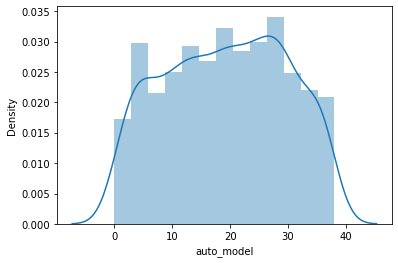

In [66]:
sns.distplot(Insurance_Claim_continuous['auto_model'],kde=True)

The plot is looking uniform with minimum and maximum value 0 and 38 respectively.

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

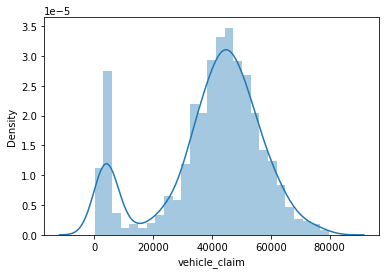

In [67]:
sns.distplot(Insurance_Claim_continuous['vehicle_claim'],kde=True)

The plot is looking bimodal with one peak higher and other peak lower with minimum and maximum value 0 and 82000 respectively.

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

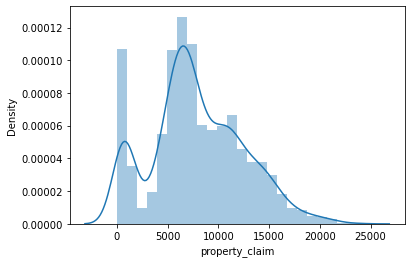

In [68]:
sns.distplot(Insurance_Claim_continuous['property_claim'],kde=True)

The plot is looking bimodal with one peak higher and other peak lower with minimum and maximum value 0 and 25000 respectively.

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

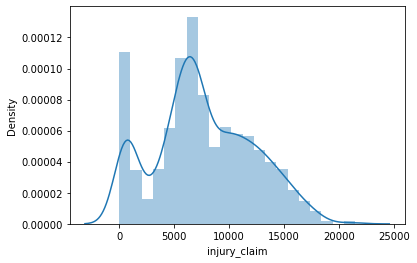

In [69]:
sns.distplot(Insurance_Claim_continuous['injury_claim'],kde=True)

The plot is looking bimodal with one peak higher and other peak lower with minimum and maximum value 0 and 24000 respectively, and positively skewed.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

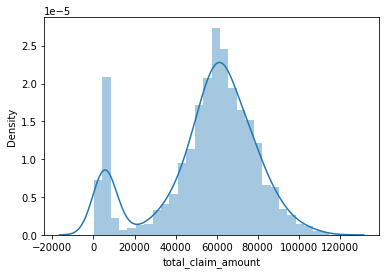

In [70]:
sns.distplot(Insurance_Claim_continuous['total_claim_amount'],kde=True)

The plot is looking bimodal with one peak higher and other peak lower with minimum and maximum value 0 and 120000 respectively, and positively skewed.

<AxesSubplot:xlabel='incident_location', ylabel='Density'>

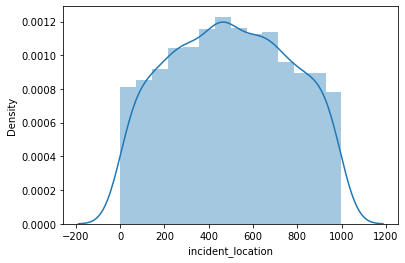

In [71]:
sns.distplot(Insurance_Claim_continuous['incident_location'],kde=True)

The plot is looking normal with minimum value 0 and maximum value 1000.

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

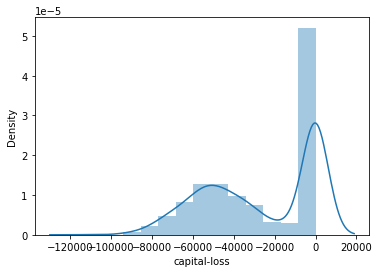

In [72]:
sns.distplot(Insurance_Claim_continuous['capital-loss'],kde=True)

The plot is looking bimodal and negatively skewed with minimum value -120000 and maximum value 0.

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

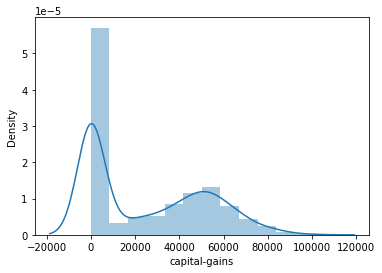

In [73]:
sns.distplot(Insurance_Claim_continuous['capital-gains'],kde=True)

The plot is looking bimodal and positively skewed with minimum value 0 and maximum value 120000.

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

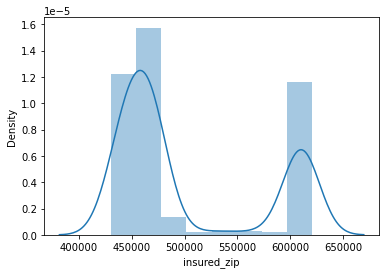

In [74]:
sns.distplot(Insurance_Claim_continuous['insured_zip'],kde=True)

The plot is looking bimodal with minimum value 420000 and maximum value 620000.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

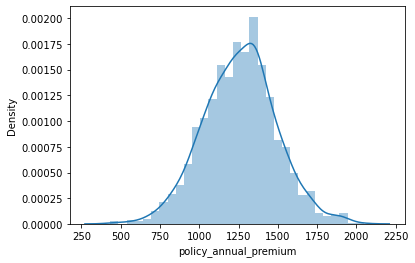

In [75]:
sns.distplot(Insurance_Claim_continuous['policy_annual_premium'],kde=True)

The data is looking normally distributed with minimum and maximum value 250 and 2250 respectively.

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

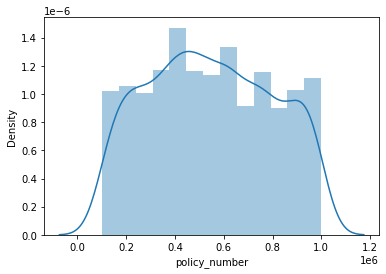

In [76]:
sns.distplot(Insurance_Claim_continuous['policy_number'],kde=True)

The data is looking uniform with minimum value 0.1 and maximum value 1.0

<AxesSubplot:xlabel='age', ylabel='Density'>

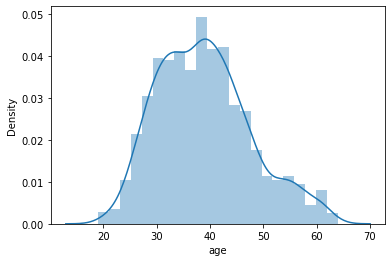

In [77]:
sns.distplot(Insurance_Claim_continuous['age'],kde=True)

The data is looking positively skewed with minimum value 20 and maximum value 70.

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

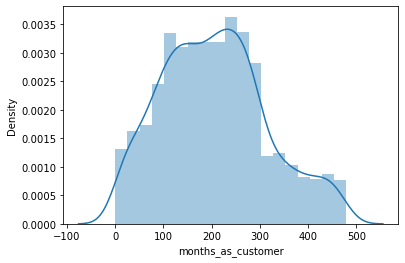

In [78]:
sns.distplot(Insurance_Claim_continuous['months_as_customer'],kde=True)

The plot is looking uniformly distributed with minimum value 0 and maximum value 480.

### Outliers Check

<AxesSubplot:>

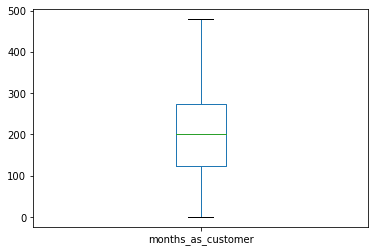

In [79]:
Insurance_Claim['months_as_customer'].plot.box()

<AxesSubplot:>

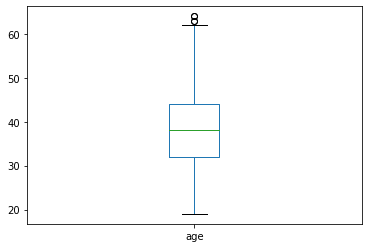

In [80]:
Insurance_Claim['age'].plot.box()

<AxesSubplot:>

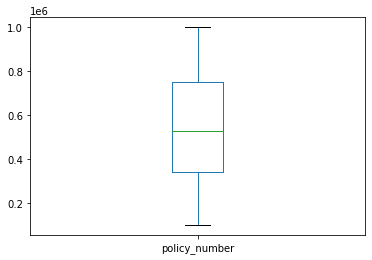

In [81]:
Insurance_Claim['policy_number'].plot.box()

<AxesSubplot:>

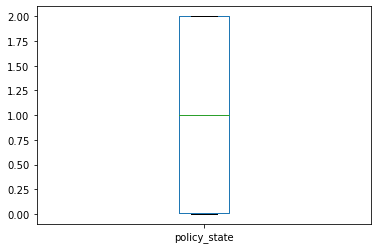

In [82]:
Insurance_Claim['policy_state'].plot.box()

<AxesSubplot:>

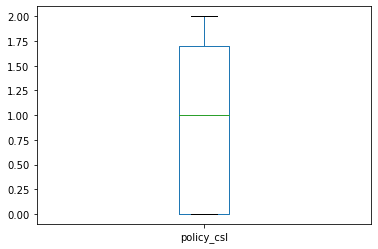

In [83]:
Insurance_Claim['policy_csl'].plot.box()

<AxesSubplot:>

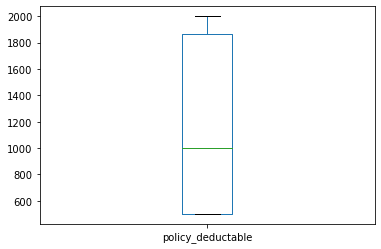

In [84]:
Insurance_Claim['policy_deductable'].plot.box()

<AxesSubplot:>

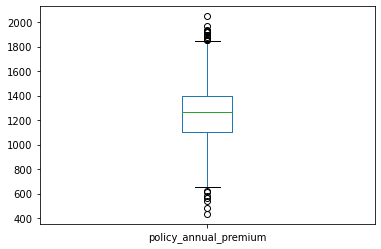

In [85]:
Insurance_Claim['policy_annual_premium'].plot.box()

<AxesSubplot:>

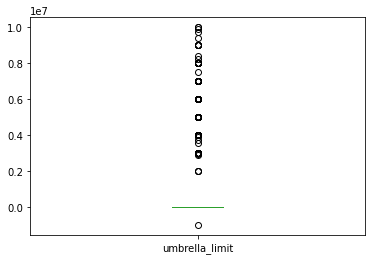

In [86]:
Insurance_Claim['umbrella_limit'].plot.box()

<AxesSubplot:>

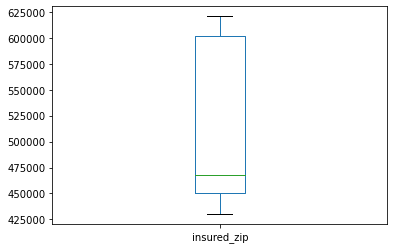

In [87]:
Insurance_Claim['insured_zip'].plot.box()

<AxesSubplot:>

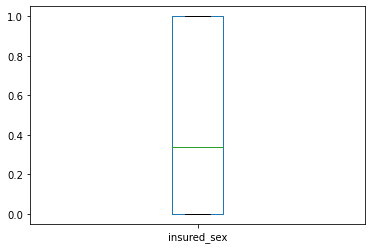

In [88]:
Insurance_Claim['insured_sex'].plot.box()

<AxesSubplot:>

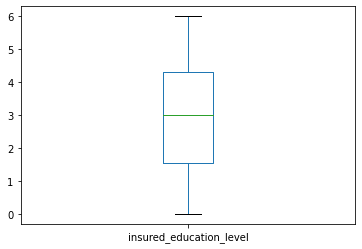

In [89]:
Insurance_Claim['insured_education_level'].plot.box()

<AxesSubplot:>

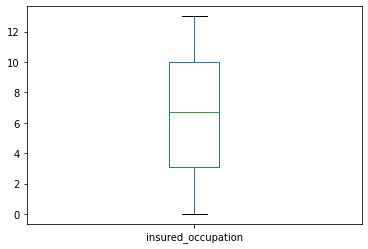

In [90]:
Insurance_Claim['insured_occupation'].plot.box()

<AxesSubplot:>

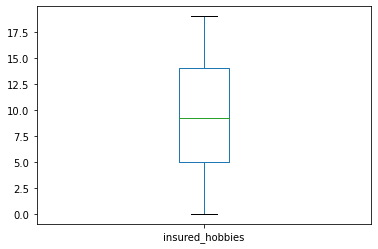

In [91]:
Insurance_Claim['insured_hobbies'].plot.box()

<AxesSubplot:>

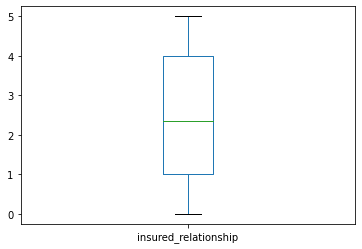

In [92]:
Insurance_Claim['insured_relationship'].plot.box()

<AxesSubplot:>

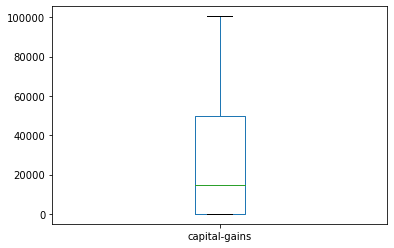

In [93]:
Insurance_Claim['capital-gains'].plot.box()

<AxesSubplot:>

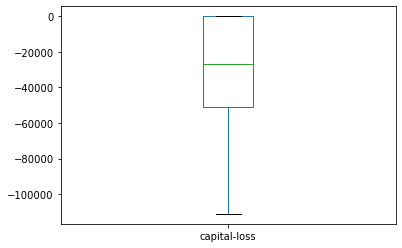

In [94]:
Insurance_Claim['capital-loss'].plot.box()

<AxesSubplot:>

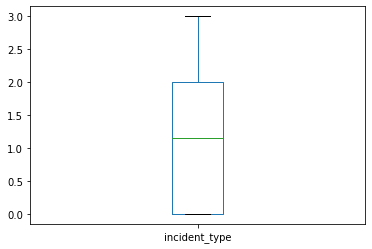

In [95]:
Insurance_Claim['incident_type'].plot.box()

<AxesSubplot:>

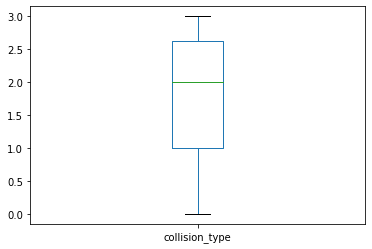

In [96]:
Insurance_Claim['collision_type'].plot.box()

<AxesSubplot:>

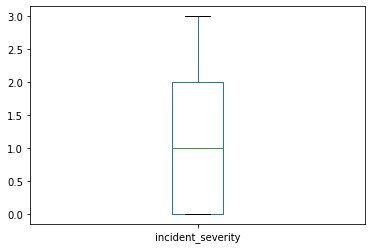

In [97]:
Insurance_Claim['incident_severity'].plot.box()

<AxesSubplot:>

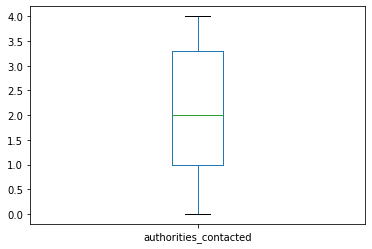

In [98]:
Insurance_Claim['authorities_contacted'].plot.box()

<AxesSubplot:>

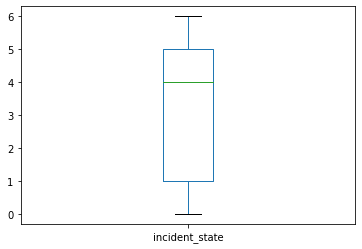

In [99]:
Insurance_Claim['incident_state'].plot.box()

<AxesSubplot:>

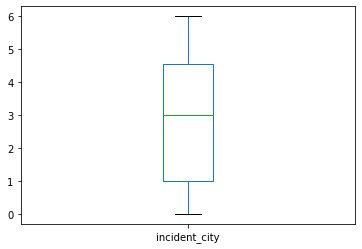

In [100]:
Insurance_Claim['incident_city'].plot.box()

<AxesSubplot:>

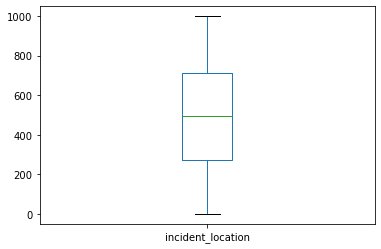

In [101]:
Insurance_Claim['incident_location'].plot.box()

<AxesSubplot:>

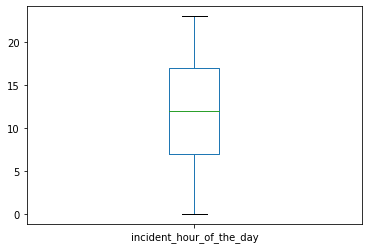

In [102]:
Insurance_Claim['incident_hour_of_the_day'].plot.box()

<AxesSubplot:>

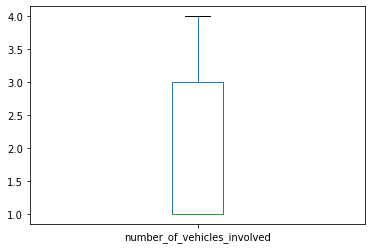

In [103]:
Insurance_Claim['number_of_vehicles_involved'].plot.box()

<AxesSubplot:>

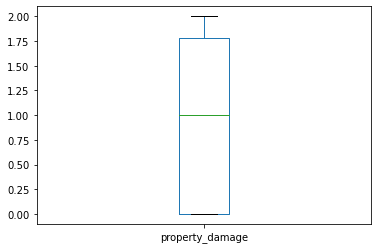

In [104]:
Insurance_Claim['property_damage'].plot.box()

<AxesSubplot:>

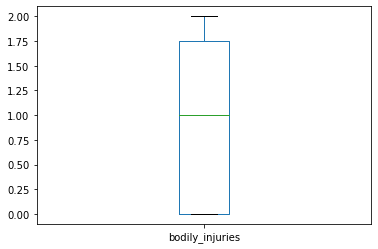

In [105]:
Insurance_Claim['bodily_injuries'].plot.box()

<AxesSubplot:>

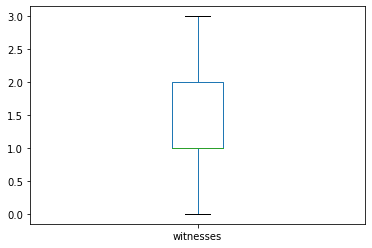

In [106]:
Insurance_Claim['witnesses'].plot.box()

<AxesSubplot:>

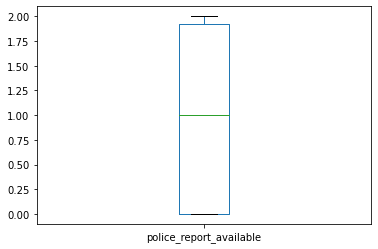

In [107]:
Insurance_Claim['police_report_available'].plot.box()

<AxesSubplot:>

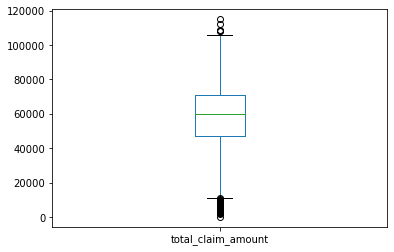

In [108]:
Insurance_Claim['total_claim_amount'].plot.box()

<AxesSubplot:>

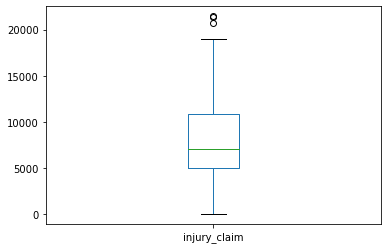

In [109]:
Insurance_Claim['injury_claim'].plot.box()

<AxesSubplot:>

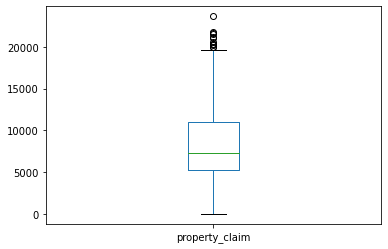

In [110]:
Insurance_Claim['property_claim'].plot.box()

<AxesSubplot:>

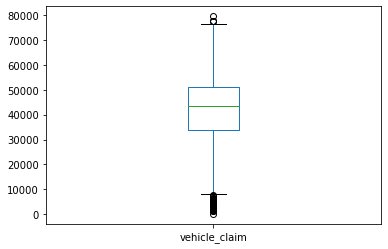

In [111]:
Insurance_Claim['vehicle_claim'].plot.box()

<AxesSubplot:>

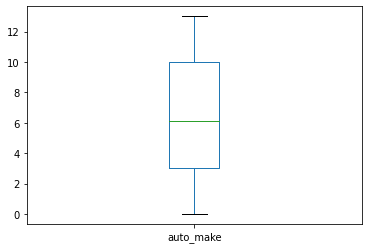

In [112]:
Insurance_Claim['auto_make'].plot.box()

<AxesSubplot:>

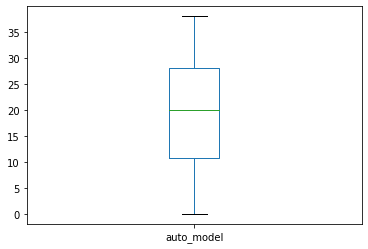

In [113]:
Insurance_Claim['auto_model'].plot.box()

<AxesSubplot:>

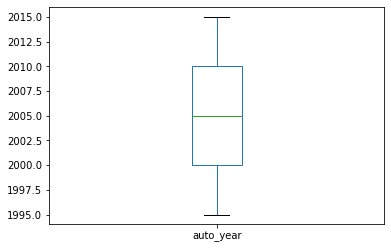

In [114]:
Insurance_Claim['auto_year'].plot.box()

<AxesSubplot:>

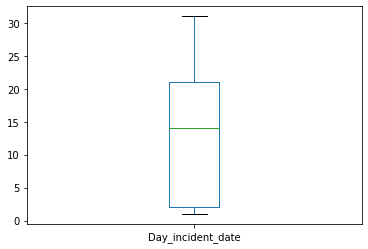

In [115]:
Insurance_Claim['Day_incident_date'].plot.box()

<AxesSubplot:>

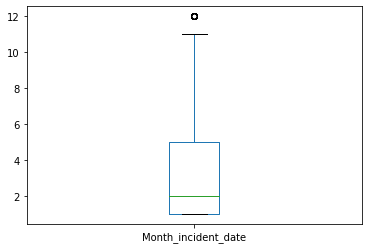

In [116]:
Insurance_Claim['Month_incident_date'].plot.box()

<AxesSubplot:>

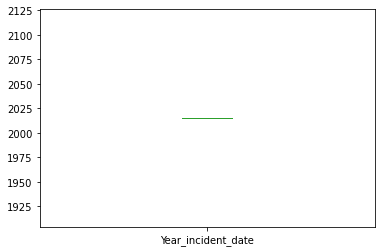

In [117]:
Insurance_Claim['Year_incident_date'].plot.box()

<AxesSubplot:>

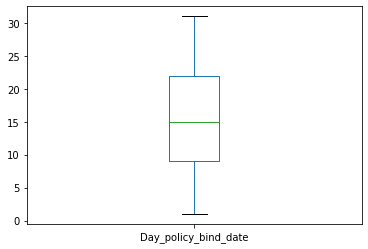

In [118]:
Insurance_Claim['Day_policy_bind_date'].plot.box()

<AxesSubplot:>

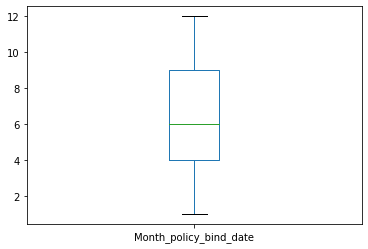

In [119]:
Insurance_Claim['Month_policy_bind_date'].plot.box()

<AxesSubplot:>

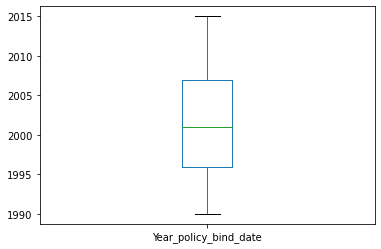

In [120]:
Insurance_Claim['Year_policy_bind_date'].plot.box()

<AxesSubplot:>

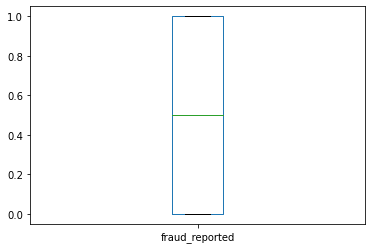

In [121]:
Insurance_Claim['fraud_reported'].plot.box()

From the above boxplots we can say that age, policy_annual_premium, umbrella_limit, total_claim_amount, injury_claim, property_claim, vehicle_claim have outliers.

## Bivariate Analysis 

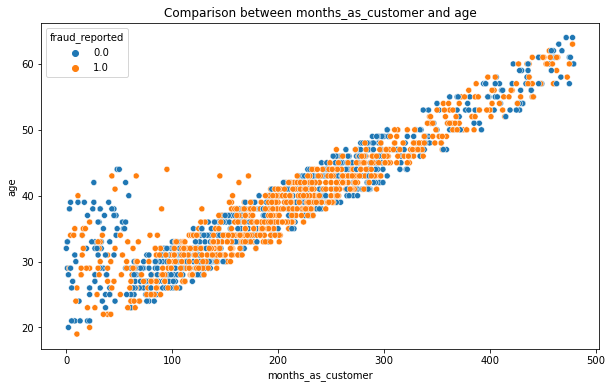

In [122]:
plt.figure(figsize=[10,6])
plt.title('Comparison between months_as_customer and age')
sns.scatterplot(Insurance_Claim['months_as_customer'], Insurance_Claim["age"], hue=Insurance_Claim["fraud_reported"]);

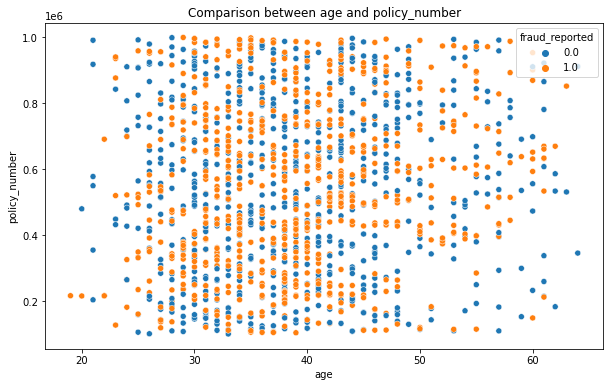

In [123]:
plt.figure(figsize=[10,6])
plt.title('Comparison between age and policy_number')
sns.scatterplot(Insurance_Claim['age'], Insurance_Claim["policy_number"], hue=Insurance_Claim["fraud_reported"]);

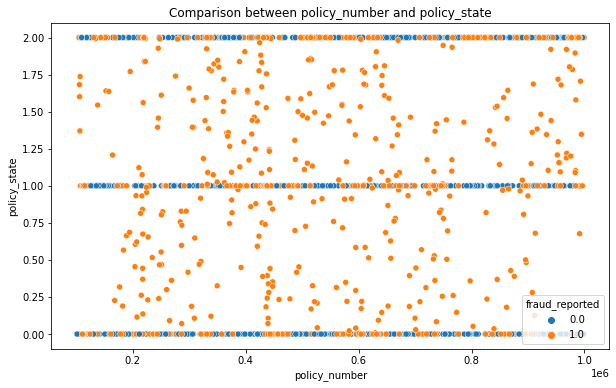

In [124]:
plt.figure(figsize=[10,6])
plt.title('Comparison between policy_number and policy_state')
sns.scatterplot(Insurance_Claim['policy_number'], Insurance_Claim["policy_state"], hue=Insurance_Claim["fraud_reported"]);

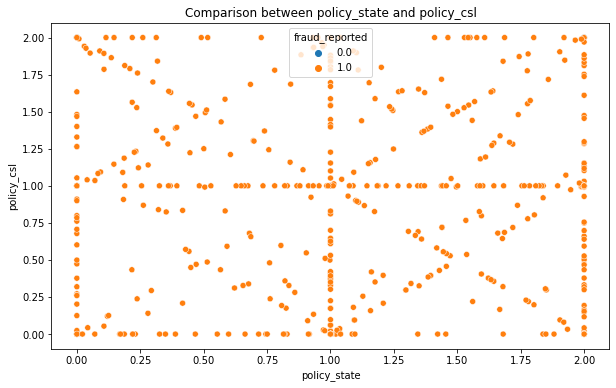

In [125]:
plt.figure(figsize=[10,6])
plt.title('Comparison between policy_state and policy_csl')
sns.scatterplot(Insurance_Claim['policy_state'], Insurance_Claim["policy_csl"], hue=Insurance_Claim["fraud_reported"]);

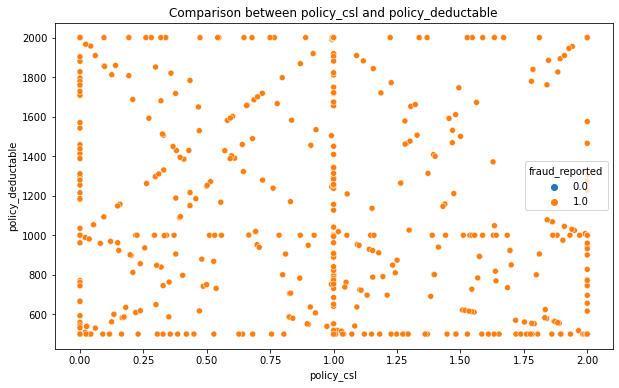

In [126]:
plt.figure(figsize=[10,6])
plt.title('Comparison between policy_csl and policy_deductable')
sns.scatterplot(Insurance_Claim['policy_csl'], Insurance_Claim["policy_deductable"], hue=Insurance_Claim["fraud_reported"]);

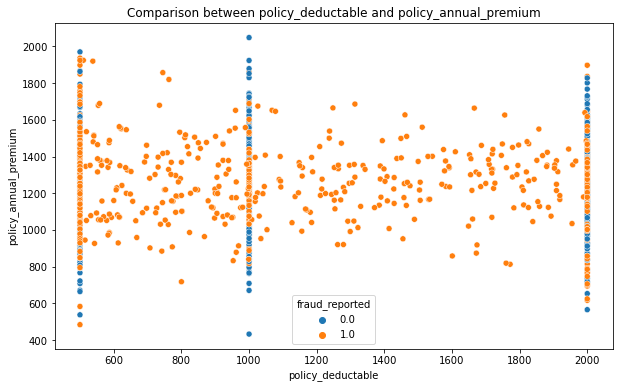

In [127]:
plt.figure(figsize=[10,6])
plt.title('Comparison between policy_deductable and policy_annual_premium')
sns.scatterplot(Insurance_Claim['policy_deductable'], Insurance_Claim["policy_annual_premium"], hue=Insurance_Claim["fraud_reported"]);

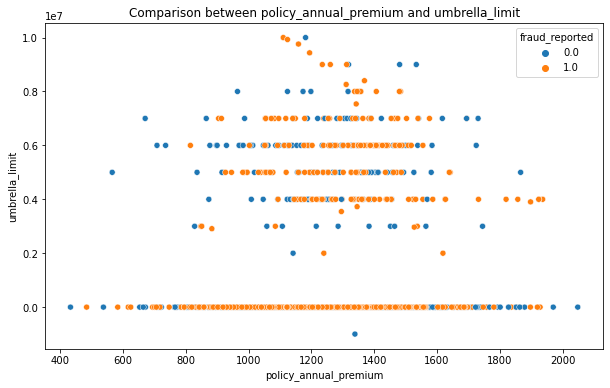

In [128]:
plt.figure(figsize=[10,6])
plt.title('Comparison between policy_annual_premium and umbrella_limit')
sns.scatterplot(Insurance_Claim['policy_annual_premium'], Insurance_Claim["umbrella_limit"], hue=Insurance_Claim["fraud_reported"]);

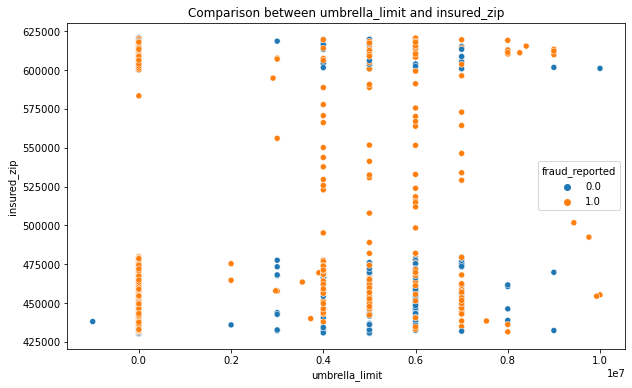

In [129]:
plt.figure(figsize=[10,6])
plt.title('Comparison between umbrella_limit and insured_zip')
sns.scatterplot(Insurance_Claim['umbrella_limit'], Insurance_Claim["insured_zip"], hue=Insurance_Claim["fraud_reported"]);

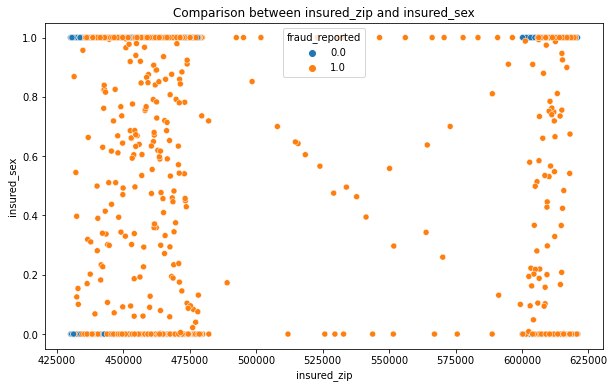

In [130]:
plt.figure(figsize=[10,6])
plt.title('Comparison between insured_zip and insured_sex')
sns.scatterplot(Insurance_Claim['insured_zip'], Insurance_Claim["insured_sex"], hue=Insurance_Claim["fraud_reported"]);

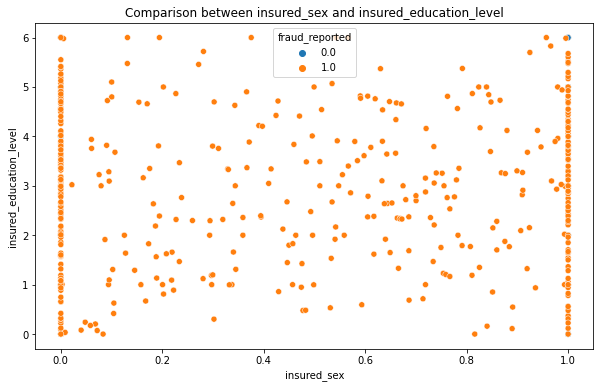

In [131]:
plt.figure(figsize=[10,6])
plt.title('Comparison between insured_sex and insured_education_level')
sns.scatterplot(Insurance_Claim['insured_sex'], Insurance_Claim["insured_education_level"], hue=Insurance_Claim["fraud_reported"]);

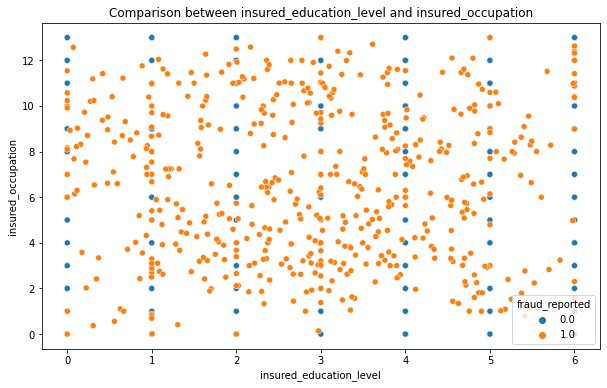

In [132]:
plt.figure(figsize=[10,6])
plt.title('Comparison between insured_education_level and insured_occupation')
sns.scatterplot(Insurance_Claim['insured_education_level'], Insurance_Claim["insured_occupation"], hue=Insurance_Claim["fraud_reported"]);

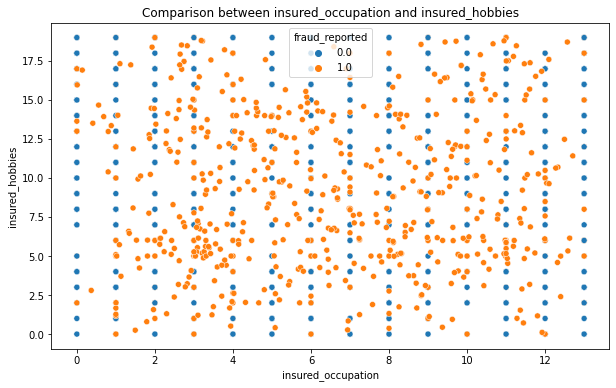

In [133]:
plt.figure(figsize=[10,6])
plt.title('Comparison between insured_occupation and insured_hobbies')
sns.scatterplot(Insurance_Claim['insured_occupation'], Insurance_Claim["insured_hobbies"], hue=Insurance_Claim["fraud_reported"]);

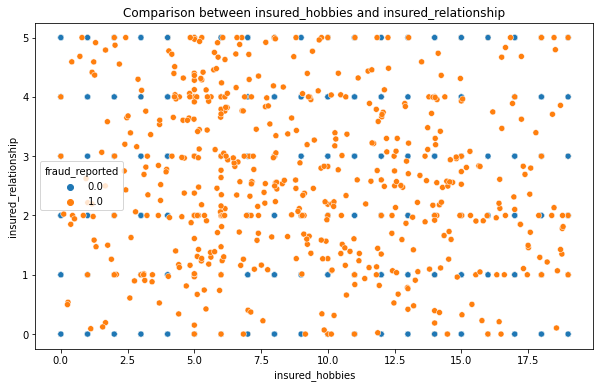

In [134]:
plt.figure(figsize=[10,6])
plt.title('Comparison between insured_hobbies and insured_relationship')
sns.scatterplot(Insurance_Claim['insured_hobbies'], Insurance_Claim["insured_relationship"], hue=Insurance_Claim["fraud_reported"]);

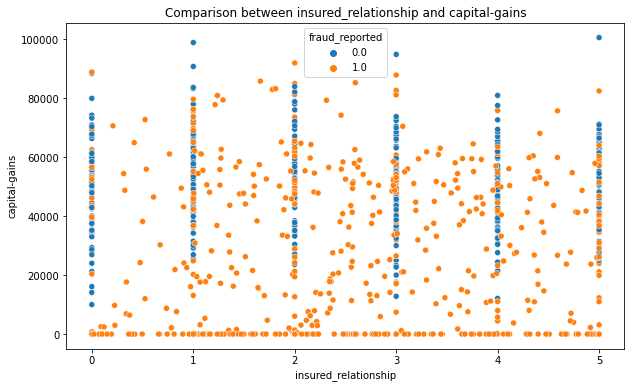

In [135]:
plt.figure(figsize=[10,6])
plt.title('Comparison between insured_relationship and capital-gains')
sns.scatterplot(Insurance_Claim['insured_relationship'], Insurance_Claim["capital-gains"], hue=Insurance_Claim["fraud_reported"]);

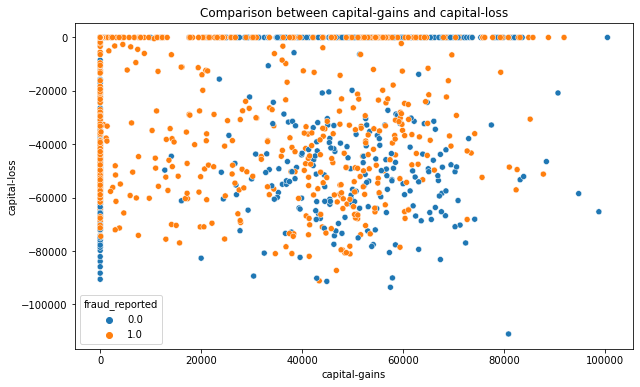

In [136]:
plt.figure(figsize=[10,6])
plt.title('Comparison between capital-gains and capital-loss')
sns.scatterplot(Insurance_Claim['capital-gains'], Insurance_Claim["capital-loss"], hue=Insurance_Claim["fraud_reported"]);

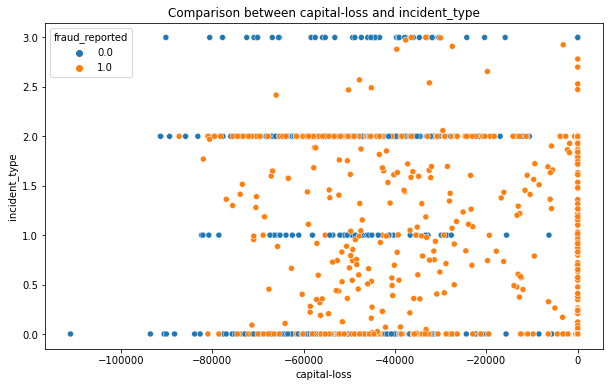

In [137]:
plt.figure(figsize=[10,6])
plt.title('Comparison between capital-loss and incident_type')
sns.scatterplot(Insurance_Claim['capital-loss'], Insurance_Claim["incident_type"], hue=Insurance_Claim["fraud_reported"]);

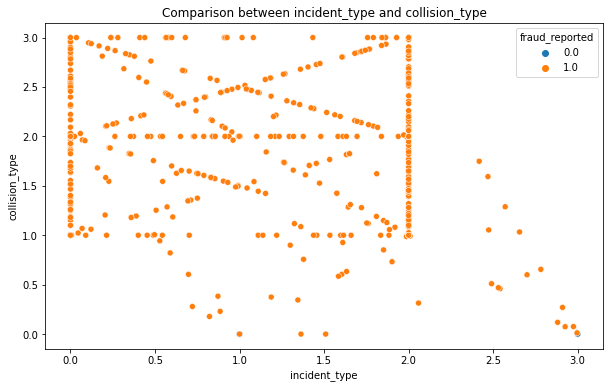

In [138]:
plt.figure(figsize=[10,6])
plt.title('Comparison between incident_type and collision_type')
sns.scatterplot(Insurance_Claim['incident_type'], Insurance_Claim["collision_type"], hue=Insurance_Claim["fraud_reported"]);

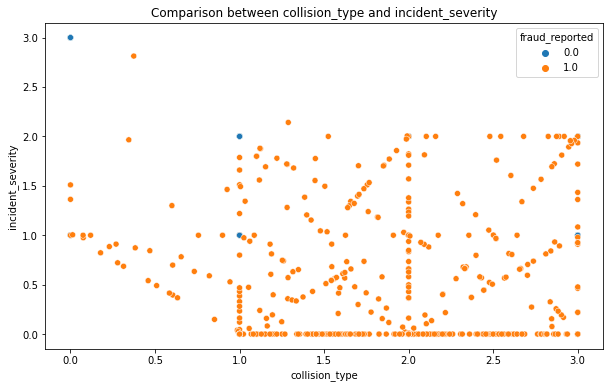

In [139]:
plt.figure(figsize=[10,6])
plt.title('Comparison between collision_type and incident_severity')
sns.scatterplot(Insurance_Claim['collision_type'], Insurance_Claim["incident_severity"], hue=Insurance_Claim["fraud_reported"]);

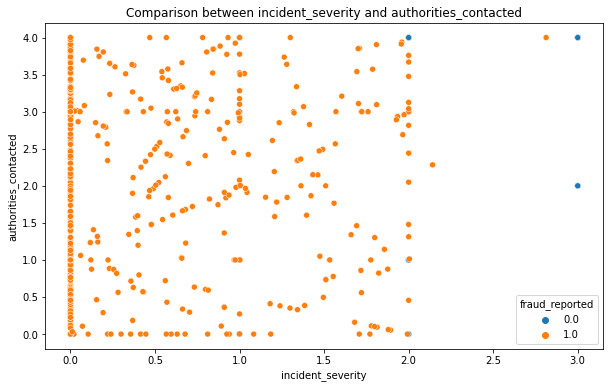

In [140]:
plt.figure(figsize=[10,6])
plt.title('Comparison between incident_severity and authorities_contacted')
sns.scatterplot(Insurance_Claim['incident_severity'], Insurance_Claim["authorities_contacted"], hue=Insurance_Claim["fraud_reported"]);

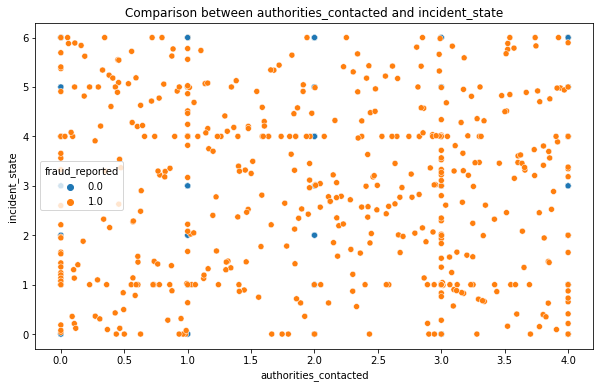

In [141]:
plt.figure(figsize=[10,6])
plt.title('Comparison between authorities_contacted and incident_state')
sns.scatterplot(Insurance_Claim['authorities_contacted'], Insurance_Claim["incident_state"], hue=Insurance_Claim["fraud_reported"]);

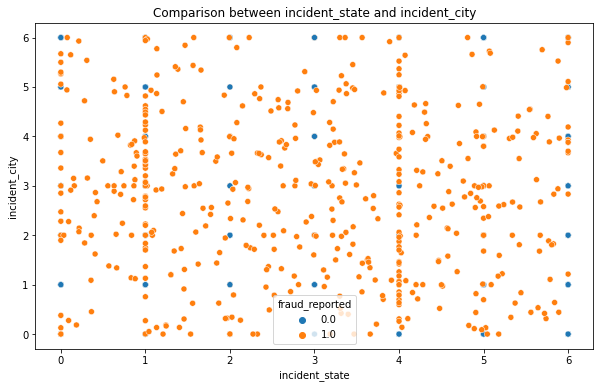

In [142]:
plt.figure(figsize=[10,6])
plt.title('Comparison between incident_state and incident_city')
sns.scatterplot(Insurance_Claim['incident_state'], Insurance_Claim["incident_city"], hue=Insurance_Claim["fraud_reported"]);

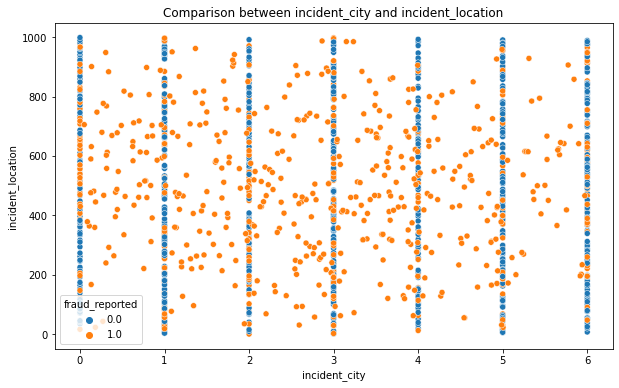

In [143]:
plt.figure(figsize=[10,6])
plt.title('Comparison between incident_city and incident_location')
sns.scatterplot(Insurance_Claim['incident_city'], Insurance_Claim["incident_location"], hue=Insurance_Claim["fraud_reported"]);

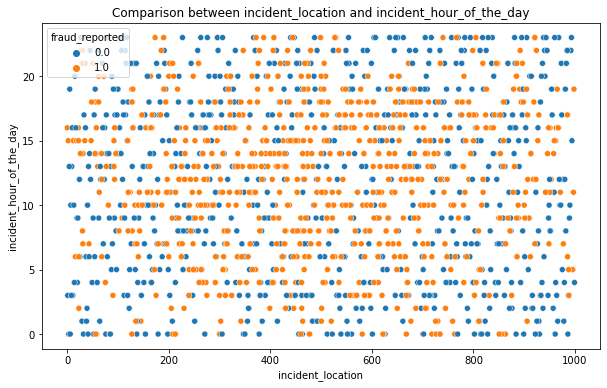

In [144]:
plt.figure(figsize=[10,6])
plt.title('Comparison between incident_location and incident_hour_of_the_day')
sns.scatterplot(Insurance_Claim['incident_location'], Insurance_Claim["incident_hour_of_the_day"], hue=Insurance_Claim["fraud_reported"]);

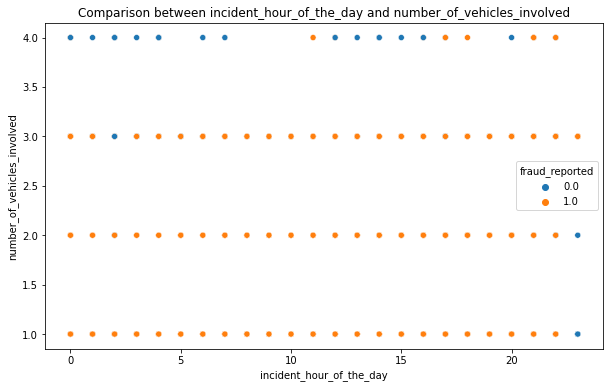

In [145]:
plt.figure(figsize=[10,6])
plt.title('Comparison between incident_hour_of_the_day and number_of_vehicles_involved')
sns.scatterplot(Insurance_Claim['incident_hour_of_the_day'], Insurance_Claim["number_of_vehicles_involved"], hue=Insurance_Claim["fraud_reported"]);

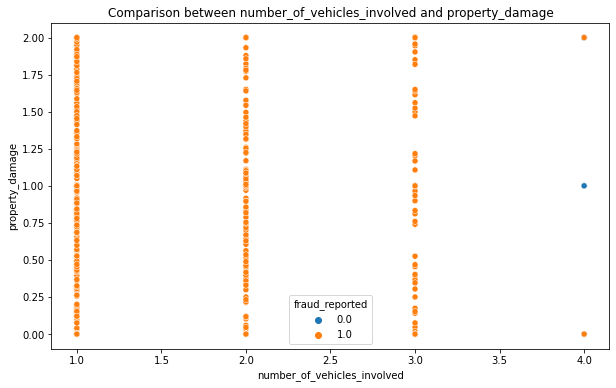

In [146]:
plt.figure(figsize=[10,6])
plt.title('Comparison between number_of_vehicles_involved and property_damage')
sns.scatterplot(Insurance_Claim['number_of_vehicles_involved'], Insurance_Claim["property_damage"], hue=Insurance_Claim["fraud_reported"]);

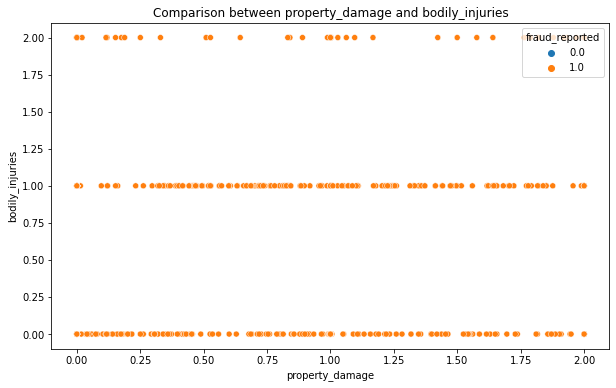

In [147]:
plt.figure(figsize=[10,6])
plt.title('Comparison between property_damage and bodily_injuries')
sns.scatterplot(Insurance_Claim['property_damage'], Insurance_Claim["bodily_injuries"], hue=Insurance_Claim["fraud_reported"]);

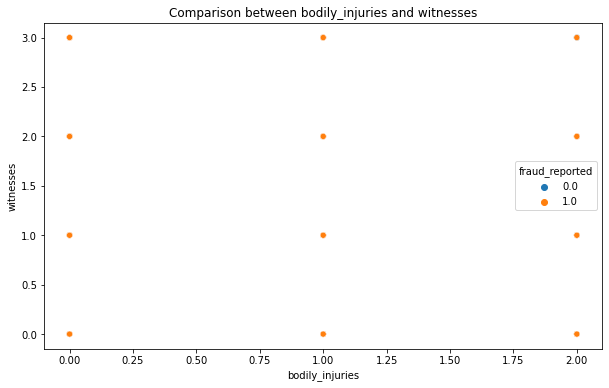

In [148]:
plt.figure(figsize=[10,6])
plt.title('Comparison between bodily_injuries and witnesses')
sns.scatterplot(Insurance_Claim['bodily_injuries'], Insurance_Claim["witnesses"], hue=Insurance_Claim["fraud_reported"]);

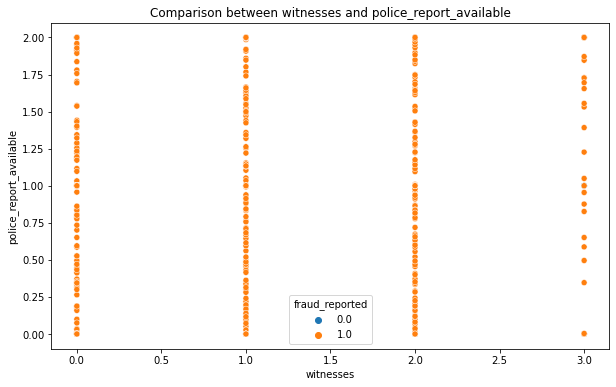

In [149]:
plt.figure(figsize=[10,6])
plt.title('Comparison between witnesses and police_report_available')
sns.scatterplot(Insurance_Claim['witnesses'], Insurance_Claim["police_report_available"], hue=Insurance_Claim["fraud_reported"]);

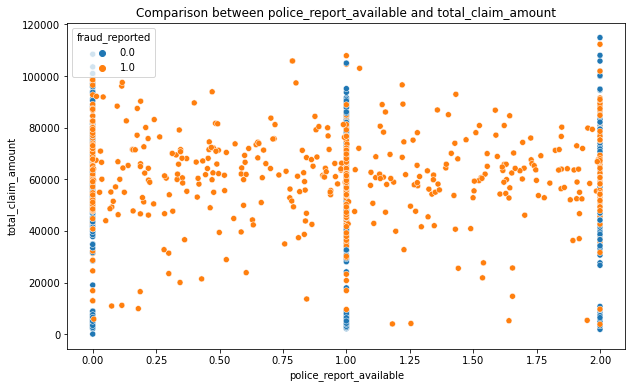

In [150]:
plt.figure(figsize=[10,6])
plt.title('Comparison between police_report_available and total_claim_amount')
sns.scatterplot(Insurance_Claim['police_report_available'], Insurance_Claim["total_claim_amount"], hue=Insurance_Claim["fraud_reported"]);

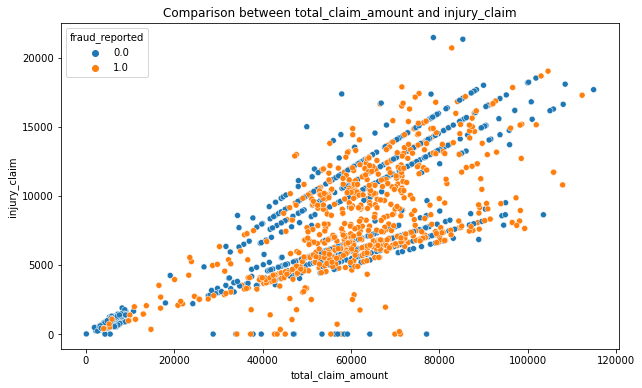

In [151]:
plt.figure(figsize=[10,6])
plt.title('Comparison between total_claim_amount and injury_claim')
sns.scatterplot(Insurance_Claim['total_claim_amount'], Insurance_Claim["injury_claim"], hue=Insurance_Claim["fraud_reported"]);

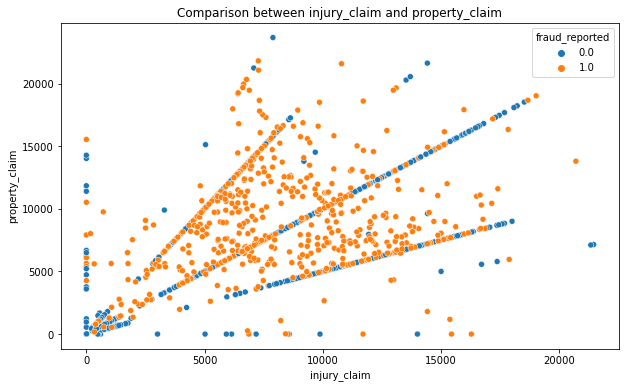

In [152]:
plt.figure(figsize=[10,6])
plt.title('Comparison between injury_claim and property_claim')
sns.scatterplot(Insurance_Claim['injury_claim'], Insurance_Claim["property_claim"], hue=Insurance_Claim["fraud_reported"]);

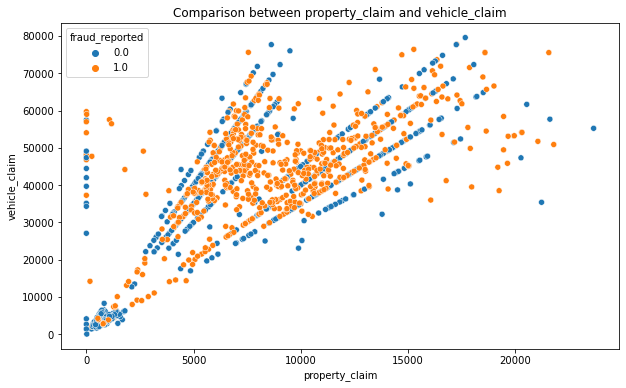

In [153]:
plt.figure(figsize=[10,6])
plt.title('Comparison between property_claim and vehicle_claim')
sns.scatterplot(Insurance_Claim['property_claim'], Insurance_Claim["vehicle_claim"], hue=Insurance_Claim["fraud_reported"]);

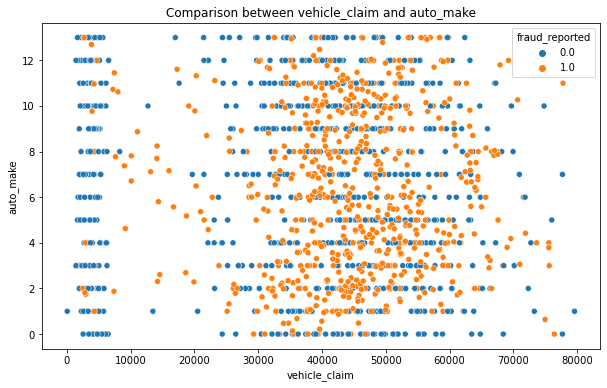

In [154]:
plt.figure(figsize=[10,6])
plt.title('Comparison between vehicle_claim and auto_make')
sns.scatterplot(Insurance_Claim['vehicle_claim'], Insurance_Claim["auto_make"], hue=Insurance_Claim["fraud_reported"]);

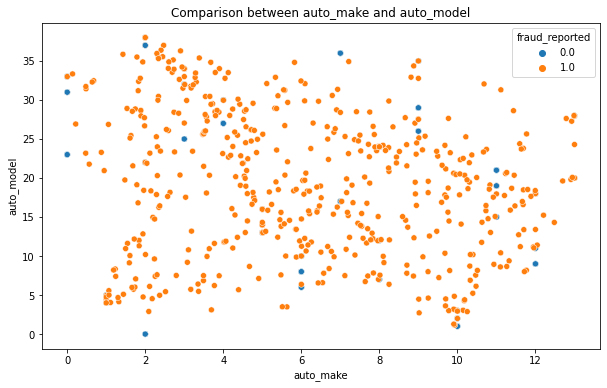

In [155]:
plt.figure(figsize=[10,6])
plt.title('Comparison between auto_make and auto_model')
sns.scatterplot(Insurance_Claim['auto_make'], Insurance_Claim["auto_model"], hue=Insurance_Claim["fraud_reported"]);

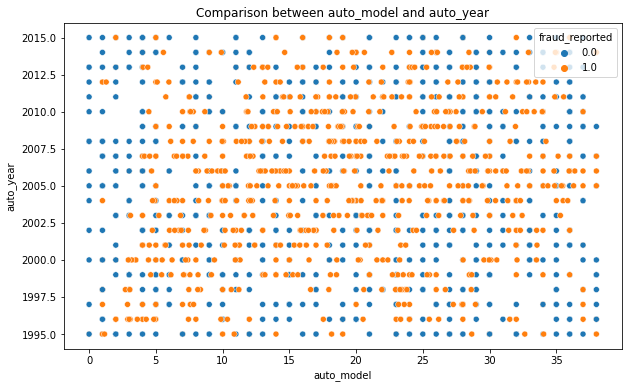

In [156]:
plt.figure(figsize=[10,6])
plt.title('Comparison between auto_model and auto_year')
sns.scatterplot(Insurance_Claim['auto_model'], Insurance_Claim["auto_year"], hue=Insurance_Claim["fraud_reported"]);

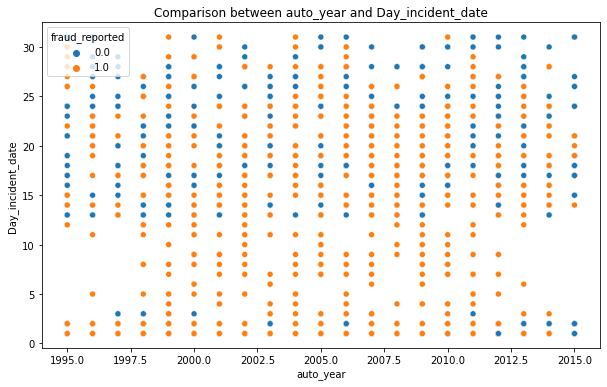

In [157]:
plt.figure(figsize=[10,6])
plt.title('Comparison between auto_year and Day_incident_date')
sns.scatterplot(Insurance_Claim['auto_year'], Insurance_Claim["Day_incident_date"], hue=Insurance_Claim["fraud_reported"]);

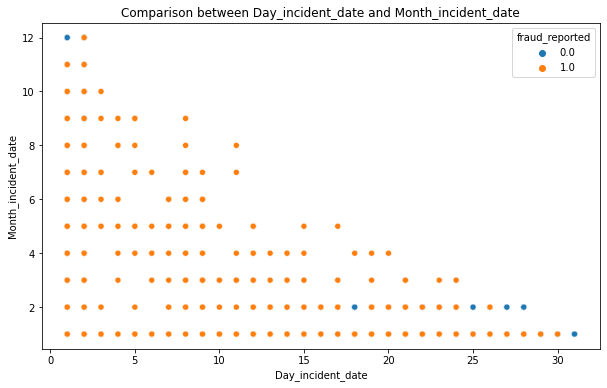

In [158]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Day_incident_date and Month_incident_date')
sns.scatterplot(Insurance_Claim['Day_incident_date'], Insurance_Claim["Month_incident_date"], hue=Insurance_Claim["fraud_reported"]);

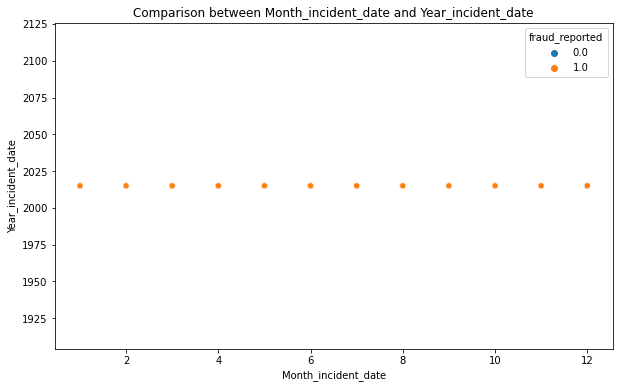

In [159]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Month_incident_date and Year_incident_date')
sns.scatterplot(Insurance_Claim['Month_incident_date'], Insurance_Claim["Year_incident_date"], hue=Insurance_Claim["fraud_reported"]);

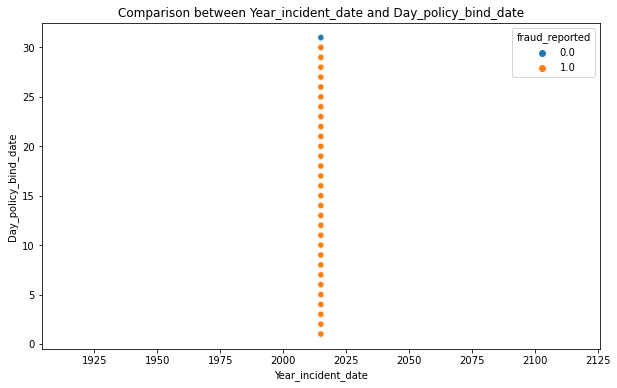

In [160]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Year_incident_date and Day_policy_bind_date')
sns.scatterplot(Insurance_Claim['Year_incident_date'], Insurance_Claim["Day_policy_bind_date"], hue=Insurance_Claim["fraud_reported"]);

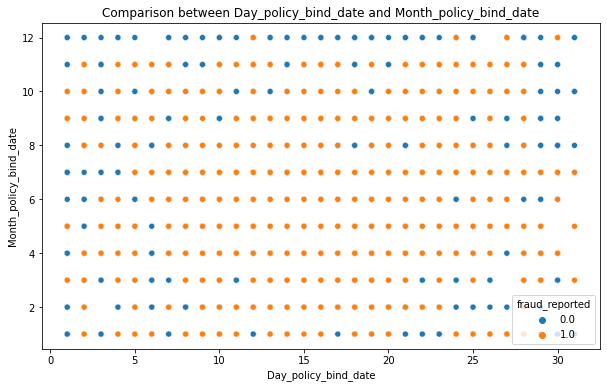

In [161]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Day_policy_bind_date and Month_policy_bind_date')
sns.scatterplot(Insurance_Claim['Day_policy_bind_date'], Insurance_Claim["Month_policy_bind_date"], hue=Insurance_Claim["fraud_reported"]);

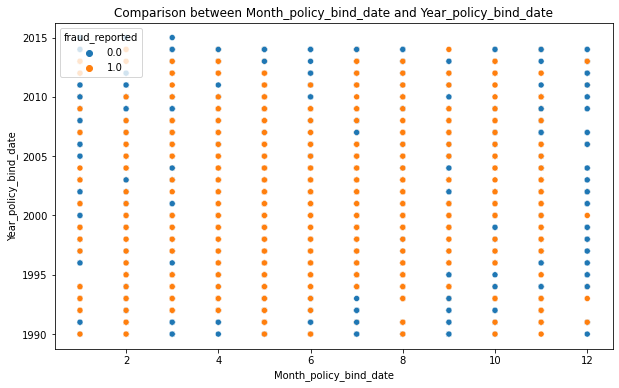

In [162]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Month_policy_bind_date and Year_policy_bind_date')
sns.scatterplot(Insurance_Claim['Month_policy_bind_date'], Insurance_Claim["Year_policy_bind_date"], hue=Insurance_Claim["fraud_reported"]);

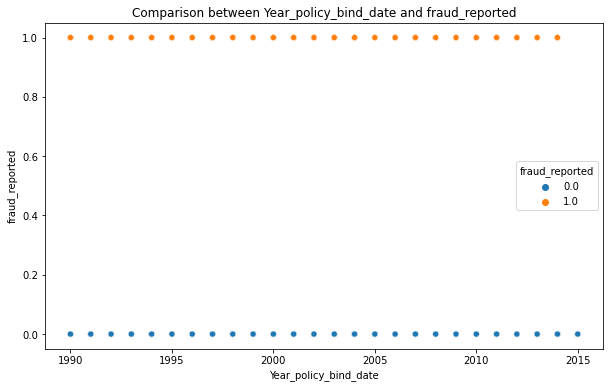

In [163]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Year_policy_bind_date and fraud_reported')
sns.scatterplot(Insurance_Claim['Year_policy_bind_date'], Insurance_Claim["fraud_reported"], hue=Insurance_Claim["fraud_reported"]);

From the above scatterplots we can say that months_as_customer and age, total_claim_amount and injury_claim, property_claim and vehicle_claim,  

In [164]:
Insurance_Claim.describe(percentiles=[0.20,0.25,0.40,0.50,0.60,0.75,0.80])

months_as_customer          age  policy_number  policy_state  \
count         1506.000000  1506.000000    1506.000000   1506.000000   
mean           205.292829    38.858566  546196.667331      1.038850   
std            109.488560     8.707841  251667.406669      0.777353   
min              0.000000    19.000000  100804.000000      0.000000   
20%            107.000000    31.000000  291902.000000      0.000000   
25%            123.000000    32.000000  341071.000000      0.005754   
40%            168.000000    36.000000  449263.000000      1.000000   
50%            200.000000    38.000000  530062.000000      1.000000   
60%            230.000000    40.000000  618659.000000      1.021284   
75%            274.000000    44.000000  749559.750000      2.000000   
80%            290.000000    46.000000  797934.000000      2.000000   
max            479.000000    64.000000  999435.000000      2.000000   

        policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
count  1506.000000        1506.000000            1506.000000    1.506000e+03   
mean      0.937822        1131.160691            1258.618321    1.243274e+06   
std       0.751719         581.234310             232.005071    2.399541e+06   
min       0.000000         500.000000             433.330000   -1.000000e+06   
20%       0.000000         500.000000            1064.867145    0.000000e+00   
25%       0.000000         500.000000            1102.084288    0.000000e+00   
40%       1.000000        1000.000000            1203.240000    0.000000e+00   
50%       1.000000        1000.000000            1263.516752    0.000000e+00   
60%       1.000000        1000.000000            1326.440000    0.000000e+00   
75%       1.695754        1865.750000            1401.120476    0.000000e+00   
80%       2.000000        2000.000000            1442.990000    4.000000e+06   
max       2.000000        2000.000000            2047.590000    1.000000e+07   

         insured_zip  insured_sex  ...    auto_make   auto_model    auto_year  \
count    1506.000000  1506.000000  ...  1506.000000  1506.000000  1506.000000   
mean   501655.612218     0.471508  ...     6.425467    19.216686  2005.090305   
std     70033.298319     0.470433  ...     3.814082    10.445094     5.627160   
min    430104.000000     0.000000  ...     0.000000     0.000000  1995.000000   
20%    446755.000000     0.000000  ...     2.604372     8.712978  1999.000000   
25%    450738.500000     0.000000  ...     3.000000    10.812338  2000.000000   
40%    461318.000000     0.000000  ...     5.000000    16.000000  2003.000000   
50%    467490.500000     0.338144  ...     6.091250    19.980026  2005.000000   
60%    472988.000000     0.910099  ...     8.000000    23.000000  2007.000000   
75%    602428.750000     1.000000  ...    10.000000    28.000000  2010.000000   
80%    606249.000000     1.000000  ...    10.053415    29.000000  2011.000000   
max    620962.000000     1.000000  ...    13.000000    38.000000  2015.000000   

       Day_incident_date  Month_incident_date  Year_incident_date  \
count        1506.000000          1506.000000              1506.0   
mean           12.586985             3.327357              2015.0   
std             9.837994             3.095771                 0.0   
min             1.000000             1.000000              2015.0   
20%             2.000000             1.000000              2015.0   
25%             2.000000             1.000000              2015.0   
40%             7.000000             2.000000              2015.0   
50%            14.000000             2.000000              2015.0   
60%            17.000000             2.000000              2015.0   
75%            21.000000             5.000000              2015.0   
80%            23.000000             6.000000              2015.0   
max            31.000000            12.000000              2015.0   

       Day_policy_bind_date  Month_policy_bind_date  Year_policy_bind_date  \
count       

Observation:

Mean is higher than median in months_as_customer,policy_number,policy_deductable,umbrella_limit,insured_zip,insured_sex,Month_incident_date,Month_policy_bind_date, so the data is positively skewed in these columns.

Small gap can be found between 75 percentile and max in months_as_customer,age,policy_deductable,policy_annual_premium,auto_make,auto_model,auto_year,Day_incident_date,Month_incident_date,Day_policy_bind_date,Month_policy_bind_date,Year_policy_bind_date,so some outliers are present in these columns.

Large gap can be found between 75 percentile and max in policy_number so more number of outliers are present in these columns.

## multivariate analysis


In [165]:
sns.pairplot(Insurance_Claim,hue="fraud_reported")  

In [166]:
cor=Insurance_Claim.corr()
cor

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.926056       0.088710   
age                                    0.926056  1.000000       0.088997   
policy_number                          0.088710  0.088997       1.000000   
policy_state                           0.026270  0.003892       0.075902   
policy_csl                            -0.048569 -0.026168       0.047398   
policy_deductable                      0.030321  0.035517       0.015619   
policy_annual_premium                  0.051173  0.061541       0.029924   
umbrella_limit                        -0.023054 -0.036744      -0.021143   
insured_zip                           -0.001354  0.012835       0.014281   
insured_sex                            0.065086  0.079171       0.020827   
insured_education_level                0.000642 -0.003943      -0.055002   
insured_occupation                     0.003538  0.001546      -0.030763   
insured_hobbies                       -0.089312 -0.083083       0.064012   
insured_relationship                   0.059742  0.058893      -0.010912   
capital-gains                          0.076709  0.050629       0.043879   
capital-loss                           0.004508 -0.009195       0.016795   
incident_type                         -0.010019 -0.016644      -0.034060   
collision_type                        -0.024064 -0.020453       0.018991   
incident_severity                     -0.059163 -0.044058      -0.018697   
authorities_contacted                  0.022761  0.017690       0.018562   
incident_state                        -0.002765  0.005105      -0.006765   
incident_city                         -0.010753 -0.004250      -0.031822   
incident_location                     -0.004154 -0.003832       0.010280   
incident_hour_of_the_day               0.090415  0.105164       0.022543   
number_of_vehicles_involved            0.006292  0.021069       0.038814   
property_damage                        0.004032 -0.024087       0.015002   
bodily_injuries                       -0.016895 -0.007024      -0.029997   
witnesses                              0.060299  0.051149       0.023222   
police_report_available                0.018458  0.018615       0.074879   
total_claim_amount                     0.059939  0.062294      -0.020870   
injury_claim                           0.067038  0.073141       0.009984   
property_claim                         0.021185  0.054769      -0.035081   
vehicle_claim                          0.060468  0.053293      -0.022381   
auto_make                              0.053007  0.040824       0.047607   
auto_model                            -0.001486 -0.004050       0.062629   
auto_year                             -0.010638 -0.020486      -0.024387   
Day_incident_date                     -0.026633 -0.015380       0.044393   
Month_incident_date                    0.025732  0.025701      -0.029832   
Year_incident_date                          NaN       NaN            NaN   
Day_policy_bind_date                   0.022813  0.024590       0.040121   
Month_policy_bind_date                -0.029035 -0.015276      -0.028010   
Year_policy_bind_date                 -0.039201 -0.035292      -0.027289   
fraud_reported                         0.024600 -0.002975      -0.017388   

                             policy_state  policy_csl  policy_deductable  \
months_as_customer               0.026270   -0.048569           0.030321   
age                              0.003892   -0.026168           0.035517   
policy_number                    0.075902    0.047398           0.015619   
policy_state                     1.000000    0.001653          -0.007143   
policy_csl                       0.001653    1.000000          -0.023185   
policy_deductable               -0.007143   -0.023185           1.000000   
policy_annual_premium            0.008973    0.016019          -0.003545   
umbrella_limit                  -0.040691   -0.001223           0.009154   


<AxesSubplot:>

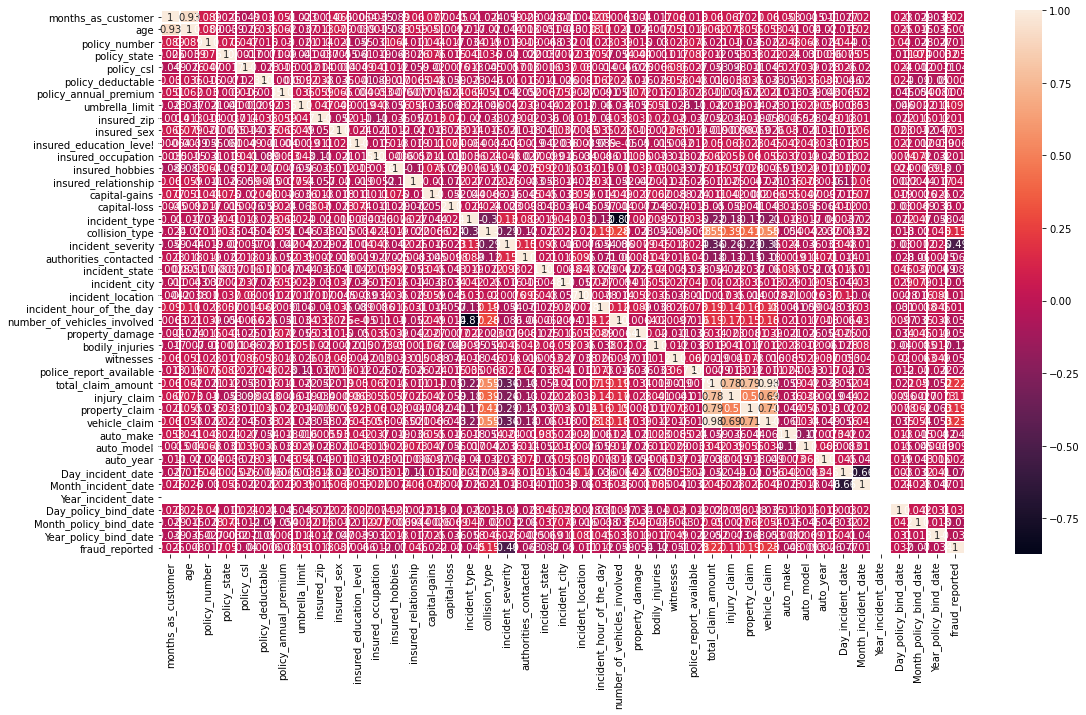

In [167]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
sns.heatmap(cor, annot=True, linewidths=.5, ax=ax)

From the correlation heatmap we have positive correlation between:

age and months_as_customer with value=0.925307



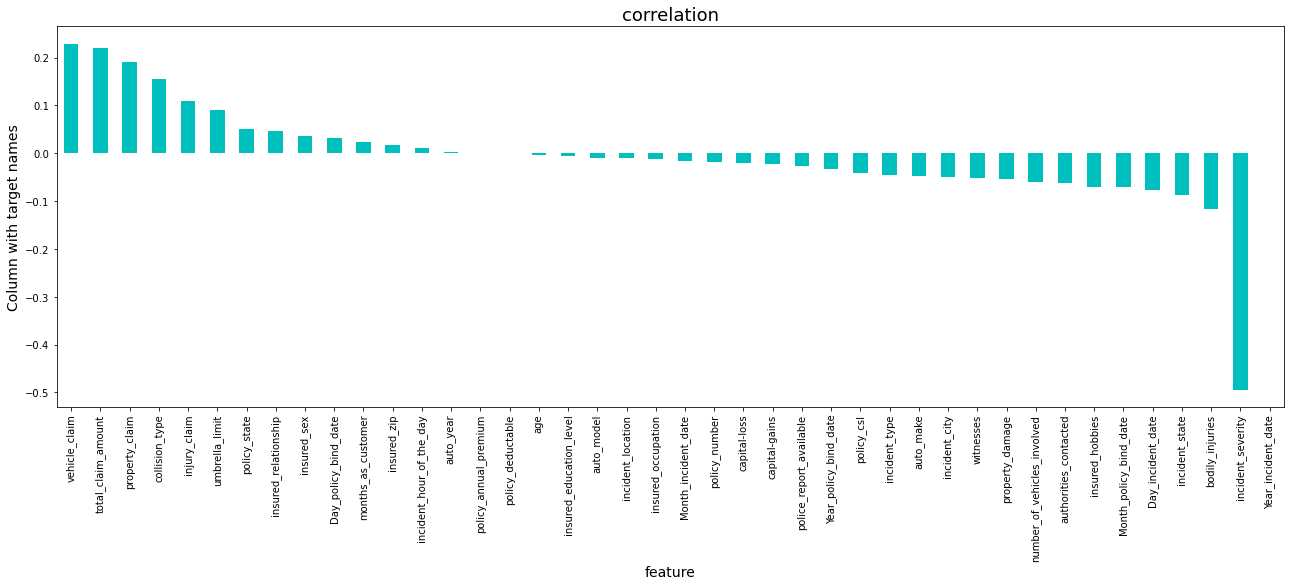

In [168]:
plt.figure(figsize=(22,7))
cor['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

## Considering the outlier removal

In [169]:
#removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(Insurance_Claim))
z

array([[1.1211028 , 1.05014214, 0.0978269 , ..., 1.13368454, 1.84492117,
        1.        ],
       [0.20746198, 0.36087909, 0.80819447, ..., 0.12471157, 0.67590833,
        1.        ],
       [0.65136038, 1.13252418, 0.56244206, ..., 0.12471157, 0.20085131,
        1.        ],
       ...,
       [0.87977058, 1.017647  , 0.44035552, ..., 0.81908551, 1.07761095,
        1.        ],
       [1.14472642, 1.59203288, 0.78215146, ..., 0.81908551, 0.82203493,
        1.        ],
       [0.60567834, 0.67301548, 1.1959976 , ..., 0.43931059, 0.93148434,
        1.        ]])

In [170]:
threshold=3
print(np.where(z>3))

(array([   6,   43,   88,  115,  163,  229,  248,  301,  430,  458,  500,
        591,  657,  700,  747,  763,  807,  836,  975, 1036, 1257, 1306,
       1374], dtype=int64), array([30,  6,  7,  7, 31,  6,  6, 31,  7,  7, 31, 31,  7,  7,  6,  6, 15,
       30,  7,  7,  7,  7,  7], dtype=int64))


In [171]:
Insurance_Claim_new=Insurance_Claim[(z<3).all(axis=1)]

In [172]:
Insurance_Claim_new

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, Day_incident_date, Month_incident_date, Year_incident_date, Day_policy_bind_date, Month_policy_bind_date, Year_policy_bind_date, fraud_reported]
Index: []

[0 rows x 43 columns]

So no data loss.

## Skewness Checking and Removal


In [173]:
Insurance_Claim.skew()

months_as_customer             0.353812
age                            0.479967
policy_number                  0.062972
policy_state                  -0.076899
policy_csl                     0.111459
policy_deductable              0.471701
policy_annual_premium          0.012424
umbrella_limit                 1.611873
insured_zip                    0.823206
insured_sex                    0.109577
insured_education_level        0.015502
insured_occupation            -0.022898
insured_hobbies                0.029515
insured_relationship           0.042732
capital-gains                  0.496829
capital-loss                  -0.356039
incident_type                  0.086286
collision_type                -0.323659
incident_severity              0.591033
authorities_contacted         -0.085779
incident_state                -0.073839
incident_city                  0.076503
incident_location              0.012721
incident_hour_of_the_day      -0.069261
number_of_vehicles_involved    0.658826


In [174]:
xnew=Insurance_Claim.drop('fraud_reported', axis=1)
ynew=Insurance_Claim['fraud_reported']

In [175]:
from sklearn.preprocessing import power_transform
x_new=power_transform(xnew, method='yeo-johnson')
x_new

array([[ 1.09053115e+00,  1.05708425e+00, -2.57731973e-02, ...,
         2.52882642e-01,  1.11176515e+00,  3.60822483e-16],
       [ 2.90847631e-01,  4.51196176e-01, -7.65380553e-01, ...,
         1.33619278e+00, -7.12698826e-02,  1.38777878e-16],
       [-5.73216764e-01, -1.19271086e+00,  5.99040554e-01, ...,
        -7.25530022e-01, -7.12698826e-02, -2.77555756e-17],
       ...,
       [-8.33016535e-01, -1.04454329e+00,  4.87019088e-01, ...,
         5.90342958e-01,  8.26617341e-01, -1.94289029e-16],
       [-1.15968726e+00, -1.83571399e+00, -7.36598936e-01, ...,
        -4.67280963e-01,  8.26617341e-01,  1.66533454e-16],
       [-5.23179138e-01, -6.25459546e-01, -1.21473658e+00, ...,
        -1.28472637e+00, -3.88638572e-01, -1.66533454e-16]])

In [176]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_scaled=SC.fit_transform(x_new)
x_scaled

array([[ 1.09053115,  1.05708425, -0.0257732 , ...,  0.25288264,
         1.11176515,  1.84471919],
       [ 0.29084763,  0.45119618, -0.76538055, ...,  1.33619278,
        -0.07126988,  0.68764001],
       [-0.57321676, -1.19271086,  0.59904055, ..., -0.72553002,
        -0.07126988, -0.18016937],
       ...,
       [-0.83301653, -1.04454329,  0.48701909, ...,  0.59034296,
         0.82661734, -1.04797875],
       [-1.15968726, -1.83571399, -0.73659894, ..., -0.46728096,
         0.82661734,  0.83227491],
       [-0.52317914, -0.62545955, -1.21473658, ..., -1.28472637,
        -0.38863857, -0.90334385]])

In [177]:
xscaled=pd.DataFrame(x_scaled)
xscaled

0         1         2         3         4         5         6   \
0     1.090531  1.057084 -0.025773  1.206568  0.185406  0.036089  0.639234   
1     0.290848  0.451196 -0.765381 -0.001614  0.185406  1.322136 -0.265035   
2    -0.573217 -1.192711  0.599041  1.206568 -1.318856  1.322136  0.666108   
3     0.524405  0.342586 -1.300232 -1.370080  0.185406  1.322136  0.677323   
4     0.290848  0.661501 -0.658143 -1.370080  1.323911  0.036089  1.402882   
...        ...       ...       ...       ...       ...       ...       ...   
1501  0.256754  0.231528 -0.661894 -0.001614 -0.212862  1.023025 -0.022634   
1502 -0.357158 -0.364897  0.127313 -1.370080  0.748549  0.751705  0.004417   
1503 -0.833017 -1.044543  0.487019 -0.642589  0.797862  0.036089  1.481438   
1504 -1.159687 -1.835714 -0.736599 -0.899270  0.185406  0.994583 -1.465492   
1505 -0.523179 -0.625460 -1.214737  0.564731 -0.563805  0.353523 -0.938479   

            7         8         9   ...        32        33        34  \
0    -0.388756 -0.394102  1.095254  ...  0.705329  0.931985 -1.912649   
1     1.270177 -0.394102  1.095254  ... -1.964081  0.468628 -0.636990   
2     1.270177 -1.286860 -1.024917  ... -1.064912 -0.563295  1.013532   
3     1.545527  1.503011 -1.024917  ...  0.614761 -0.855066  1.349432   
4     1.545527  1.503011  1.095254  ... -1.928386 -1.918481  1.098280   
...        ...       ...       ...  ...       ...       ...       ...   
1501  1.270177  0.331265  0.630076  ... -1.523599  0.396680 -0.486968   
1502  1.545527  1.558808 -1.024917  ... -0.049430  1.036786 -1.104713   
1503 -0.388756 -0.561494  1.095254  ...  0.444295  1.046453 -1.038276   
1504 -0.388756  1.558808  0.585937  ...  0.619606 -1.071436 -1.099192   
1505 -0.388756 -0.394102  0.170640  ...  0.121628  0.867728 -0.096924   

            35        36        37   38        39        40        41  
0    -0.211461  1.125410 -1.075213  0.0  0.252883  1.111765  1.844719  
1     0.323611  0.884980 -1.075213  0.0  1.336193 -0.071270  0.687640  
2     0.323611  0.947532 -0.038346  0.0 -0.725530 -0.071270 -0.180169  
3     1.613179 -1.345806  1.569037  0.0  1.128218 -0.388639 -1.626518  
4     0.686134  0.614886 -0.038346  0.0 -1.138185 -0.071270  1.844719  
...        ...       ...       ...  ...       ...       ...       ...  
1501  0.504287  0.465324  0.496216  0.0  0.590343 -0.388639  0.976910  
1502 -1.080472 -0.179636 -0.038346  0.0  0.916352  0.535031  0.832275  
1503 -1.080472 -0.295780 -1.075213  0.0  0.590343  0.826617 -1.047979  
1504  0.869159 -0.712600  1.046788  0.0 -0.467281  0.826617  0.832275  
1505  0.144099 -1.345806  1.569037  0.0 -1.284726 -0.388639 -0.903344  

[1506 rows x 42 columns]

In [178]:
xscaled.rename(columns = {0:'months_as_customer', 1:'age',
                              2:'policy_number',3:'policy_state',4:'policy_csl',5:'policy_deductable',6:'policy_annual_premium',7:'umbrella_limit',8:'insured_zip',9:'insured_sex',10:'insured_education_level',11:'insured_occupation',12:'insured_hobbies',13:'insured_relationship',14:'capital-gains',15:'capital-loss',16:'incident_type',17:'collision_type',18:'incident_severity',19:'authorities_contacted',20:'incident_state',21:'incident_city',22:'incident_location',23:'incident_hour_of_the_day',24:'number_of_vehicles_involved',25:'property_damage',26:'bodily_injuries',27:'witnesses',28:'police_report_available',29:'total_claim_amount',30:'injury_claim',31:'property_claim',32:'vehicle_claim',33:'auto_make',34:'auto_model',35:'auto_year',36:'Day_incident_date',37:'Month_incident_date',38:'Year_incident_date',39:'Day_policy_bind_date',40:'Month_policy_bind_date',41:'Year_policy_bind_date'}, inplace = True)
xscaled

months_as_customer       age  policy_number  policy_state  policy_csl  \
0               1.090531  1.057084      -0.025773      1.206568    0.185406   
1               0.290848  0.451196      -0.765381     -0.001614    0.185406   
2              -0.573217 -1.192711       0.599041      1.206568   -1.318856   
3               0.524405  0.342586      -1.300232     -1.370080    0.185406   
4               0.290848  0.661501      -0.658143     -1.370080    1.323911   
...                  ...       ...            ...           ...         ...   
1501            0.256754  0.231528      -0.661894     -0.001614   -0.212862   
1502           -0.357158 -0.364897       0.127313     -1.370080    0.748549   
1503           -0.833017 -1.044543       0.487019     -0.642589    0.797862   
1504           -1.159687 -1.835714      -0.736599     -0.899270    0.185406   
1505           -0.523179 -0.625460      -1.214737      0.564731   -0.563805   

      policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0              0.036089               0.639234       -0.388756    -0.394102   
1              1.322136              -0.265035        1.270177    -0.394102   
2              1.322136               0.666108        1.270177    -1.286860   
3              1.322136               0.677323        1.545527     1.503011   
4              0.036089               1.402882        1.545527     1.503011   
...                 ...                    ...             ...          ...   
1501           1.023025              -0.022634        1.270177     0.331265   
1502           0.751705               0.004417        1.545527     1.558808   
1503           0.036089               1.481438       -0.388756    -0.561494   
1504           0.994583              -1.465492       -0.388756     1.558808   
1505           0.353523              -0.938479       -0.388756    -0.394102   

      insured_sex  ...  vehicle_claim  auto_make  auto_model  auto_year  \
0        1.095254  ...       0.705329   0.931985   -1.912649  -0.211461   
1        1.095254  ...      -1.964081   0.468628   -0.636990   0.323611   
2       -1.024917  ...      -1.064912  -0.563295    1.013532   0.323611   
3       -1.024917  ...       0.614761  -0.855066    1.349432   1.613179   
4        1.095254  ...      -1.928386  -1.918481    1.098280   0.686134   
...           ...  ...            ...        ...         ...        ...   
1501     0.630076  ...      -1.523599   0.396680   -0.486968   0.504287   
1502    -1.024917  ...      -0.049430   1.036786   -1.104713  -1.080472   
1503     1.095254  ...       0.444295   1.046453   -1.038276  -1.080472   
1504     0.585937  ...       0.619606  -1.071436   -1.099192   0.869159   
1505     0.170640  ...       0.121628   0.867728   -0.096924   0.144099   

      Day_incident_date  Month_incident_date  Year_incident_date  \
0              1.125410            -1.075213                 0.0   
1              0.884980            -1.075213                 0.0   
2              0.947532            -0.038346                 0.0   
3             -1.345806             1.569037                 0.0   
4              0.614886            -0.038346                 0.0   
...                 ...                  ...                 ...   
1501           0.465324             0.496216                 0.0   
1502          -0.179636            -0.038346                 0.0   
1503          -0.295780            -1.075213                 0.0   
1504          -0.712600             1.046788                 0.0   
1505          -1.345806             1.569037                 0.0   

      Day_policy_bind_date  Month_policy_bind_date  Year_policy_bind_date  
0                 0.252883                1.111765               1.844719  
1                 1.336193               -0.071270               0.687640  
2                -0.725530               -0.071270              -0.180169  
3                 1.128218               -0.388639              -1.626518  
4         

#### VIF for checking and removing multicollinearity problem


In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
def calculate_vif(a):
    vif=pd.DataFrame()
    vif["variables"]=a.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
    return(vif)

In [181]:
calculate_vif(xscaled)

variables  VIF FACTOR
0            months_as_customer    5.299679
1                           age    5.279802
2                 policy_number    1.057626
3                  policy_state    1.073576
4                    policy_csl    1.050823
5             policy_deductable    1.066139
6         policy_annual_premium    1.059679
7                umbrella_limit    1.058116
8                   insured_zip    1.063622
9                   insured_sex    1.059171
10      insured_education_level    1.047048
11           insured_occupation    1.051160
12              insured_hobbies    1.079883
13         insured_relationship    1.065291
14                capital-gains    1.067309
15                 capital-loss    1.075666
16                incident_type    7.381193
17               collision_type    1.753525
18            incident_severity    1.212403
19        authorities_contacted    1.093507
20               incident_state    1.056183
21                incident_city    1.051891
22            incident_location    1.061844
23     incident_hour_of_the_day    1.128597
24  number_of_vehicles_involved    7.375218
25              property_damage    1.056814
26              bodily_injuries    1.042863
27                    witnesses    1.057686
28      police_report_available    1.053555
29           total_claim_amount  229.207845
30                 injury_claim   11.354578
31               property_claim   12.312360
32                vehicle_claim  116.458562
33                    auto_make    1.069089
34                   auto_model    1.072224
35                    auto_year    1.055123
36            Day_incident_date    2.105468
37          Month_incident_date    2.133287
38           Year_incident_date         NaN
39         Day_policy_bind_date    1.031954
40       Month_policy_bind_date    1.064115
41        Year_policy_bind_date    1.054497

From the VIF data we will remove the incident_type,number_of_vehicles_involved,total_claim_amount,vehicle_claim because of the high VIF value

In [182]:
xscaled=xscaled.drop(['incident_type','number_of_vehicles_involved','total_claim_amount','injury_claim','property_claim','vehicle_claim'], axis=1)

In [183]:
xscaled

months_as_customer       age  policy_number  policy_state  policy_csl  \
0               1.090531  1.057084      -0.025773      1.206568    0.185406   
1               0.290848  0.451196      -0.765381     -0.001614    0.185406   
2              -0.573217 -1.192711       0.599041      1.206568   -1.318856   
3               0.524405  0.342586      -1.300232     -1.370080    0.185406   
4               0.290848  0.661501      -0.658143     -1.370080    1.323911   
...                  ...       ...            ...           ...         ...   
1501            0.256754  0.231528      -0.661894     -0.001614   -0.212862   
1502           -0.357158 -0.364897       0.127313     -1.370080    0.748549   
1503           -0.833017 -1.044543       0.487019     -0.642589    0.797862   
1504           -1.159687 -1.835714      -0.736599     -0.899270    0.185406   
1505           -0.523179 -0.625460      -1.214737      0.564731   -0.563805   

      policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0              0.036089               0.639234       -0.388756    -0.394102   
1              1.322136              -0.265035        1.270177    -0.394102   
2              1.322136               0.666108        1.270177    -1.286860   
3              1.322136               0.677323        1.545527     1.503011   
4              0.036089               1.402882        1.545527     1.503011   
...                 ...                    ...             ...          ...   
1501           1.023025              -0.022634        1.270177     0.331265   
1502           0.751705               0.004417        1.545527     1.558808   
1503           0.036089               1.481438       -0.388756    -0.561494   
1504           0.994583              -1.465492       -0.388756     1.558808   
1505           0.353523              -0.938479       -0.388756    -0.394102   

      insured_sex  ...  police_report_available  auto_make  auto_model  \
0        1.095254  ...                 1.283974   0.931985   -1.912649   
1        1.095254  ...                -1.325069   0.468628   -0.636990   
2       -1.024917  ...                 0.143640  -0.563295    1.013532   
3       -1.024917  ...                 0.143640  -0.855066    1.349432   
4        1.095254  ...                 0.143640  -1.918481    1.098280   
...           ...  ...                      ...        ...         ...   
1501     0.630076  ...                -0.830617   0.396680   -0.486968   
1502    -1.024917  ...                 0.062423   1.036786   -1.104713   
1503     1.095254  ...                 1.283974   1.046453   -1.038276   
1504     0.585937  ...                -0.317367  -1.071436   -1.099192   
1505     0.170640  ...                 0.033498   0.867728   -0.096924   

      auto_year  Day_incident_date  Month_incident_date  Year_incident_date  \
0     -0.211461           1.125410            -1.075213                 0.0   
1      0.323611           0.884980            -1.075213                 0.0   
2      0.323611           0.947532            -0.038346                 0.0   
3      1.613179          -1.345806             1.569037                 0.0   
4      0.686134           0.614886            -0.038346                 0.0   
...         ...                ...                  ...                 ...   
1501   0.504287           0.465324             0.496216                 0.0   
1502  -1.080472          -0.179636            -0.038346                 0.0   
1503  -1.080472          -0.295780            -1.075213                 0.0   
1504   0.869159          -0.712600             1.046788                 0.0   
1505   0.144099          -1.345806             1.569037                 0.0   

      Day_policy_bind_date  Month_policy_bind_date  Year_policy_bind_date  
0                 0.252883                1.111765               1.844719  
1                 1.336193               -0.071270               0.687640  
2                -0.725530               -

In [184]:
xtrain=xscaled
ytrain=ynew

## train_test_split

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print("accuracy score is",accu*100, "at random_state", i)

accuracy score is 82.49496981891348 at random_state 0
accuracy score is 83.09859154929578 at random_state 1
accuracy score is 84.10462776659959 at random_state 2
accuracy score is 83.90342052313883 at random_state 3
accuracy score is 85.11066398390342 at random_state 4
accuracy score is 83.09859154929578 at random_state 5
accuracy score is 87.32394366197182 at random_state 6
accuracy score is 82.09255533199196 at random_state 7
accuracy score is 85.11066398390342 at random_state 8
accuracy score is 83.09859154929578 at random_state 9
accuracy score is 84.30583501006036 at random_state 10
accuracy score is 80.88531187122736 at random_state 11
accuracy score is 81.08651911468813 at random_state 12
accuracy score is 85.11066398390342 at random_state 13
accuracy score is 83.29979879275655 at random_state 14
accuracy score is 82.29376257545272 at random_state 15
accuracy score is 84.70824949698189 at random_state 16
accuracy score is 85.3118712273642 at random_state 17
accuracy score is 84.

In [186]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu, "on Random_state", maxRS)

Best accuracy is  0.8732394366197183 on Random_state 26


In [187]:
x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=28)


#### Now we are checking accuracy using various algorithm.

In [188]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [189]:
# Import Support vector classifier
from sklearn.svm import SVC
SV = SVC()
SV.fit(x_train, y_train)
predsv = SV.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test, predsv))

0.869215291750503
[[212  34]
 [ 31 220]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       246
         1.0       0.87      0.88      0.87       251

    accuracy                           0.87       497
   macro avg       0.87      0.87      0.87       497
weighted avg       0.87      0.87      0.87       497



In [190]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
#RandomForestClassifier(100)----> Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8792756539235412
[[218  28]
 [ 32 219]]
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       246
         1.0       0.89      0.87      0.88       251

    accuracy                           0.88       497
   macro avg       0.88      0.88      0.88       497
weighted avg       0.88      0.88      0.88       497



In [191]:
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8571428571428571
[[206  40]
 [ 31 220]]
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       246
         1.0       0.85      0.88      0.86       251

    accuracy                           0.86       497
   macro avg       0.86      0.86      0.86       497
weighted avg       0.86      0.86      0.86       497



In [192]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8953722334004024
[[212  34]
 [ 18 233]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       246
         1.0       0.87      0.93      0.90       251

    accuracy                           0.90       497
   macro avg       0.90      0.90      0.90       497
weighted avg       0.90      0.90      0.90       497



In [193]:
#k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6378269617706237
[[ 71 175]
 [  5 246]]
              precision    recall  f1-score   support

         0.0       0.93      0.29      0.44       246
         1.0       0.58      0.98      0.73       251

    accuracy                           0.64       497
   macro avg       0.76      0.63      0.59       497
weighted avg       0.76      0.64      0.59       497



## Cross-Validation-Score

In [194]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(SV,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71192053 0.80066445 0.91362126 0.910299   0.95681063]
0.8586631757277068
0.08968481378412194


In [195]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.69536424 0.82059801 0.92026578 0.93687708 0.93687708]
0.8619964357219864
0.09390384058062125


In [196]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.6589404  0.7641196  0.92026578 0.9269103  0.94684385]
0.8434159864469428
0.11304306659437086


In [197]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gb,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.73509934 0.84385382 0.89700997 0.94019934 0.93355482]
0.869943455589536
0.07560224229820178


In [198]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.58278146 0.6013289  0.66445183 0.61129568 0.64451827]
0.6208752282678048
0.029607010854546412


Here we have GradientBoostingClassifier as our best model.

## Hyper parameter tuning

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
parameter = {'n_estimators':np.arange(1,9),
            'min_samples_leaf':np.arange(2,10), 
            'learning_rate':np.arange(1,7),
            'min_samples_split' :np.arange(3,7)}

In [201]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameter,cv=5)

In [202]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([3, 4, 5, 6]),
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [203]:
GCV.best_params_

{'learning_rate': 1,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 2}

In [204]:
Final_model= GradientBoostingClassifier(learning_rate = 1, min_samples_leaf = 9, min_samples_split = 3, n_estimators = 4)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

87.5251509054326


## AUC-ROC Curve

In [205]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

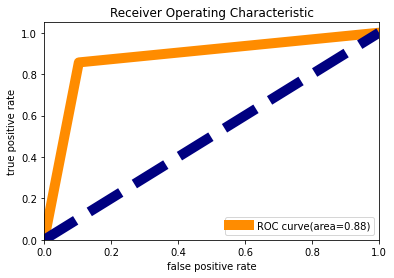

In [206]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Saving the Model

In [207]:
import joblib
joblib.dump(Final_model,"Evaluation_Project_10.pkl")

['Evaluation_Project_10.pkl']

## Conclusion

In [208]:
import numpy as np
a=np.array(y_test)
predicted=np.array(pred)
Insurance_Claim_Final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
Insurance_Claim_Final

original  predicted
0         0.0        0.0
1         1.0        0.0
2         0.0        1.0
3         0.0        0.0
4         1.0        0.0
..        ...        ...
492       1.0        1.0
493       0.0        1.0
494       0.0        0.0
495       0.0        0.0
496       1.0        1.0

[497 rows x 2 columns]

Here 1 denotes Y and 0 denotes N